***
$$\mathbf{\text{Simulation/Experimental Output Processing and ML-MF Correction}}$$<br>
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$\mathbf{\text{Date: 06/01}}$<br>

#### Note sw: Switching -> CO<->O2 ; CO*<->O* To match KMC specnum file


#### It also |uses the MKM input files that match this order *_sw

#### As well as the new test set KMC_NonDynamic_Data_iCovg_iRates_sw

#### Switch the pressures accordingly CO <-> O2

***
$\mathbf{\text{Model being explored: Simple 4-step CO Oxidation}}:$<br>

${\text{Corresponding Micro Kinetic Model}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$

In [1]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


***

<a id="top"></a><br>
 # Table of Contents  
1. [Loading in the labeled simulation folders](#1)   
    1. [Checking all simulations were completed as expected](#1.1)
1. [Developing ML Training Dataset for rate correction](#2) 
    1. [Generating Experimental Data Dictionary](#2.1) 
    1. [Generating MF-MKM Data Dictionary](#2.2)     
    1. [Creating Features](#2.3)      
        C1. [Log ratio](#2.3.1)     
        C2. [Percent Difference](#2.3.2)    
        
    1. [Creating Input/Feature Tensor](#2.4)
    1. [Extracting Full X (Feature) and Y(Target) datasets](#2.5)
    1. [Performing Train/Test X and Y Split datasets](#2.6)
1. [Modelling](#3)
1. [Describing Possible Machine Learning Model Algorithms](#4)
1. [Selecting and Training the Model](#5)
1. [Importing External/Experimental Data to be used in the model](#6)
    1. [Generating corresponding MF-MKModel](#6.1) 
    1. [Predicting Machine-Learned Mean-Field Corrections](#6.2)
    1. [ML Correction to MF-MKModel](#6.3)
    1. [Evaluating the ML model prediction](#6.4)
    1. [Plotting results](#6.5)
    
1. [Exploring and Evaluating possible ML options](#7)

***
<a id="1"></a> 
## 1. Loading in the labeled simulation folders
<a href="#top">Back to top</a>

In [2]:
os.getcwd()

'/Users/klkusima/Desktop/RASH_Research/CO_ox/Kinetics/OOP_Kinetics/MiKi/Input_data_KMC_Lateral/KMC_output_varied_coverage'

In [3]:
%%time
Sim_folder_names = []
i = 0
for file in glob.glob("Sim_*"):
    Sim_folder_names.append(file)
    i+=1
print('Number of simulations:',i)
print(Sim_folder_names)
#os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #Changes directory back to where this script is

Number of simulations: 55
['Sim_A_0_B_77', 'Sim_A_44_B_55', 'Sim_A_55_B_22', 'Sim_A_22_B_77', 'Sim_A_88_B_11', 'Sim_A_22_B_22', 'Sim_A_33_B_0', 'Sim_A_33_B_55', 'Sim_A_0_B_22', 'Sim_A_22_B_0', 'Sim_A_66_B_11', 'Sim_A_11_B_44', 'Sim_A_11_B_88', 'Sim_A_11_B_11', 'Sim_A_0_B_100', 'Sim_A_77_B_11', 'Sim_A_11_B_33', 'Sim_A_11_B_66', 'Sim_A_66_B_33', 'Sim_A_44_B_0', 'Sim_A_44_B_22', 'Sim_A_55_B_0', 'Sim_A_100_B_0', 'Sim_A_22_B_55', 'Sim_A_0_B_55', 'Sim_A_33_B_22', 'Sim_A_33_B_66', 'Sim_A_0_B_11', 'Sim_A_44_B_33', 'Sim_A_55_B_44', 'Sim_A_66_B_0', 'Sim_A_0_B_0', 'Sim_A_22_B_11', 'Sim_A_55_B_11', 'Sim_A_22_B_44', 'Sim_A_33_B_33', 'Sim_A_0_B_88', 'Sim_A_0_B_44', 'Sim_A_11_B_22', 'Sim_A_66_B_22', 'Sim_A_11_B_77', 'Sim_A_77_B_0', 'Sim_A_88_B_0', 'Sim_A_11_B_0', 'Sim_A_11_B_55', 'Sim_A_77_B_22', 'Sim_A_44_B_44', 'Sim_A_0_B_66', 'Sim_A_33_B_11', 'Sim_A_22_B_66', 'Sim_A_55_B_33', 'Sim_A_22_B_33', 'Sim_A_44_B_11', 'Sim_A_0_B_33', 'Sim_A_33_B_44']
CPU times: user 1.78 ms, sys: 1.22 ms, total: 3 ms
Wall 

In [4]:
set_init_coverages = np.empty([len(Sim_folder_names),4])
#Remember: A='CO*'; B='O*'
#Reading A and B initial coverages from the KMC simulation input coverage files
c = 0 #counter
for s in Sim_folder_names:
    set_coverages = []
    for i in np.arange(len(s)):
        if i<(len(s)-2) and s[i].isdigit() and (s[i+1]).isdigit() and (s[i+2]).isdigit():
            cov_triple = int(s[i:i+3])
            set_coverages.append(cov_triple)
            
        elif i<(len(s)-1) and s[i].isdigit() and (s[i+1]).isdigit()and not((s[i-1]).isdigit()):
            cov_double = int(s[i:i+2])
            set_coverages.append(cov_double)
            
#             print(cov_double)
        elif s[i].isdigit() and not((s[i-1]).isdigit()) and not((s[i-2]).isdigit()):
            cov_single = int(s[i])
            set_coverages.append(cov_single)
                                #B_O*_covg,     A_CO*_covg,     O2*_covg,*_covg
    set_init_coverages[c,:] = [set_coverages[1],set_coverages[0],0,100-sum(set_coverages)]
    c+=1 #counter

In [5]:
os.getcwd()

'/Users/klkusima/Desktop/RASH_Research/CO_ox/Kinetics/OOP_Kinetics/MiKi/Input_data_KMC_Lateral/KMC_output_varied_coverage'

In [6]:
#Checking to see match
## Copying all the other input files into the different simulation folders
# Extracting initial coverages
#Remember: A='CO*'; B='O*'
n_points = 500 #From KMC simulation 
n_gas_species = 3 #From KMC simulation
n_surf_species = 4 #From KMC simulation

Exp_init_coverages = np.empty([len(Sim_folder_names),n_surf_species])
c = 0 #counter
for s in Sim_folder_names:
    os.chdir(s)
    file=open('specnum_output.txt','r').readlines() #Reading in the relevant file
    b=[]
    for i in np.arange(len(file)): 
        b.append(file[i].split())                   #Dividing the rows into columns
    o = pd.DataFrame(data=b)                        #Final output

#     print(o)
    #Extracting Number of Sites from the general_output file:
    inp=open('general_output.txt','r').readlines()
    for i in np.arange(len(inp)): 
        if 'Total number of lattice sites:' in inp[i]:
            val = i  #Line in text file where sentence is present

    sites = int(inp[val][35:])
    
    #Finding number of surface species
    headings = (o.iloc[0,:])
    n_ss = sum('*' in h for h in headings) #Number of surface species
    
    #Finding number of gas species
    n_gs = len(headings)-5-n_ss
    
    #Adding column to calculate number of empty sites
    n_c=(len(o.iloc[0,:])) #number of current columns
    o[n_c]=" "           #Creating new empty column 
    o.iloc[0,n_c]="*"    #Labelling the new empty column 

    st = 0 #Initializing empty site coverage vector


    for i in range(len(o.iloc[1:])):
        if n_ss==0:
            site = sites
        else:
            for j in range(n_ss):
                st = st + float(o.iloc[i+1,5+j]) #Calculating no. of empty sites #Asuming empty sites are first to be reportes (i.e @5)
            site = sites - st
            st = 0
        o.iloc[i+1,n_c] = site
    
    Sspecies = []
    for i in range(n_ss):
        Sspecies.append(5+i) 
    Sspecies.append(len(o.iloc[1,:])-1)#Including empty sites

    #Calculating itme:
    Gtime = o[2][1:].astype(float) 
    #Calculating coverages:
    Scoverages = np.empty([len(o.iloc[:,1])-1,len(Sspecies)])
    for i in range(len(Scoverages[1,:])):
        Scoverages[:,i] = o[Sspecies[i]][1:].astype(float)/sites
        
    exp_init_covg = []
    for i in np.arange(n_surf_species):    #B_O*_covg,     A_CO*_covg,     O2*_covg, *_covg
        exp_init_covg.append(Scoverages[0,i])
        
    Exp_init_coverages[c,:] = exp_init_covg
    
    c+=1
    
    
    os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #Changes directory back to where this script is

<a id="1.1"></a> 
## 1.1 Checking all simulations were completed as expected
<a href="#top">Back to top</a>

In [7]:
if np.shape(set_init_coverages) != np.shape(Exp_init_coverages):
    raise Exception('Not all simulations have been completed successfully')
    
for i in np.arange(np.shape(set_init_coverages)[0]):
    for j in np.arange(np.shape(set_init_coverages)[1]):
        norm_val = set_init_coverages[i,j]
        exp_val = round(Exp_init_coverages[i,j])
        if not( norm_val + 1 > exp_val) and not(norm_val - 1 < exp_val): #i.e if not within range
            raise Exception('Initial coverages used in the simulation are not the same as it was set')
            
        if (i==(np.shape(set_init_coverages)[0] - 1) and j==(np.shape(set_init_coverages)[1] - 1)):
            print('SIMULATIONS MATCH AS EXPECTED')

SIMULATIONS MATCH AS EXPECTED


***
<a id="2"></a> 
## 2. Developing ML Training Dataset for rate correction
<a href="#top">Back to top</a>

## Dictionary formats:

***
<a id="2.1"></a> 
## 2.A  Generating Experimental Data Dictionary
<a href="#top">Back to top</a>

In [8]:
#os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #Changes directory back to where this script is

In [9]:
%%time
## Copying all the other input files into the different simulation folders
# Extracting initial coverages
#Remember: A='CO*'; B='O*'
n = len(Sim_folder_names)

Covg = np.zeros((n,n_points,n_surf_species)) #CO*, O*, O2*, *
Rates = np.zeros((n,n_points,n_gas_species)) #CO, O2, CO2
KMC_time_Array = np.zeros((n,n_points))
init_coverages = np.empty([n,n_surf_species])
c = 0 #counter for number of simulation (folders)

for s in Sim_folder_names:
    os.chdir(s)
    file=open('specnum_output.txt','r').readlines() #Reading in the relevant file
    b=[]
    for i in np.arange(len(file)): 
        b.append(file[i].split())                   #Dividing the rows into columns
    o = pd.DataFrame(data=b)                        #Final output

#     print(o)
    #Extracting Number of Sites from the general_output file:
    inp=open('general_output.txt','r').readlines()
    for i in np.arange(len(inp)): 
        if 'Total number of lattice sites:' in inp[i]:
            val = i  #Line in text file where sentence is present

    sites = int(inp[val][34:])
    
    #Finding number of surface species
    headings = (o.iloc[0,:])
    n_ss = sum('*' in h for h in headings) #Number of surface species
    
    #Finding number of gas species
    n_gs = len(headings)-5-n_ss
    
    #Adding column to calculate number of empty sites
    n_c=(len(o.iloc[0,:])) #number of current columns
    o[n_c]=" "           #Creating new empty column 
    o.iloc[0,n_c]="*"    #Labelling the new empty column 

    st = 0 #Initializing empty site coverage vector


    for i in range(len(o.iloc[1:])):
        if n_ss==0:
            site = sites
        else:
            for j in range(n_ss):
                st = st + float(o.iloc[i+1,5+j]) #Calculating no. of empty sites #Asuming empty sites are first to be reportes (i.e @5)
            site = sites - st
            st = 0
        o.iloc[i+1,n_c] = site
    
    Sspecies = []
    for i in range(n_ss):
        Sspecies.append(5+i) 
    Sspecies.append(len(o.iloc[1,:])-1)#Including empty sites

    #Calculating itme:
    Gtime = o[2][1:].astype(float) 
    
    #Calculating coverages:
    Scoverages = np.empty([len(o.iloc[:,1])-1,len(Sspecies)])
    for i in range(len(Scoverages[1,:])):
        Scoverages[:,i] = o[Sspecies[i]][1:].astype(float)/sites
        
    Gspecies = []
    for i in range(n_gs):
        Gspecies.append(5+n_ss+i) 
        
    #Extracting the number of gas species molecules:    
    Gnmol = np.empty([len(o.iloc[:,1])-1,len(Gspecies)])
    for i in range(len(Gnmol[1,:])):
        Gnmol[:,i] = o[Gspecies[i]][1:].astype(float)
    
    ### Calculating the instantaneous rates of profuction (i.e grad/sites)
    TOF_GS = np.empty([len(o.iloc[:,1])-1,len(Gspecies)]) #initializing an array of instantaneous TOFs for gaseous species

    for i in np.arange(len(Gspecies)):
        grads = np.gradient(Gnmol[:,i],Gtime,edge_order=2)
        TOF_GS[:,i] = grads/sites
    
    
    #initializing TOF for gas species
    STOF = np.empty([n_points,n_gas_species])
    gs_names = (o.iloc[0,Gspecies].tolist())
    gs_names_colmn = []
    
    for i in np.arange(n_gas_species): #Collecting TOFs
        STOF[:,i] = pd.Series(TOF_GS[:,i])
        
    for i in gs_names: #Collecting gas names
        gs_names_colmn.append('R_'+i)
    
    Rates_p = pd.DataFrame(STOF,
                    columns = gs_names_colmn)

    init_covg = []
    for i in np.arange(n_surf_species):    #B_O*_covg,     A_CO*_covg,     O2*_covg, *_covg
        init_covg.append(Scoverages[0,i])
        
    init_coverages[c,:]= init_covg #Initial coverages
    
    KMC_time_Array[c,:]= Gtime #Time matrix
     
    Covg[c,:,:] = Scoverages #Coverage profile tensor
    
    Rates[c,:,:] = Rates_p
    
    c+=1
    
    os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir)) #Changes directory back to where this script is

#https://stackoverflow.com/questions/49881570/python-dictionaries-appending-arrays-to-a-dictionary-for-a-specific-key
data_KMC_dict = {'init_covg': init_coverages, 'sim_time': KMC_time_Array, 'covg_prof': Covg, 'iRates': Rates}

CPU times: user 1.9 s, sys: 9.82 ms, total: 1.91 s
Wall time: 1.92 s


## Starting to Create ML dataset
### x:n_features ; y = n_points ; z = n_simulations

<a id="2.4"></a> 
## 2.D  Creating Input/Feature Tensor
<a href="#top">Back to top</a>

In [10]:
%%time
## Creating Simulation file names input

Sim_names_tens = np.empty((n,n_points,1),dtype=np.dtype('U100'))
for i in np.arange(n):
    for j in np.arange(n_points):
        Sim_names_tens[i,j,:] = Sim_folder_names[i]

## Creating Init coverages tensor input
ini_covg_tens = np.empty((n,n_points,n_surf_species),dtype=float)
for i in np.arange(n):
    for j in np.arange(n_points):
        ini_covg_tens[i,j,:] = data_KMC_dict['init_covg'][i,:]

## Creating time tensor input
sim_time_tens = np.empty((n,n_points,1),dtype=float)
for i in np.arange(n):
    for z in np.arange(1):
        sim_time_tens[i,:,z] = data_KMC_dict['sim_time'][i,:]

CPU times: user 42.8 ms, sys: 4.19 ms, total: 47 ms
Wall time: 48.2 ms


## Tenosr_To_Array Function

In [11]:
def Tensor_To_Array(Sim_tens):
    a = Sim_tens
    m,n,r = a.shape
    sim_arr = np.column_stack((np.repeat(np.arange(m),n),a.reshape(m*n,-1)))
    return sim_arr

## Creating Dataframe

In [12]:
out_df = pd.DataFrame(Tensor_To_Array(Sim_names_tens),columns= ['Sim_ndex','Sim_names'])

In [13]:
#Adding initial coverages
surf_names = (o.iloc[0,Sspecies].tolist())
for i in np.arange(n_surf_species):
    spec = surf_names[i]
    out_df['Init_Covg_'+spec] = pd.DataFrame(Tensor_To_Array(ini_covg_tens))[1+i]

In [14]:
#Adding time
out_df['Time'] = pd.DataFrame(Tensor_To_Array(sim_time_tens))[1]

In [15]:
## Adding KMC results

In [16]:
#Adding coverage profiles of surface species
surf_names = (o.iloc[0,Sspecies].tolist())
for i in np.arange(n_surf_species):
    spec = surf_names[i]
    out_df['KMC_Covg_'+spec] = pd.DataFrame(Tensor_To_Array(data_KMC_dict['covg_prof']))[1+i]

In [17]:
#Adding iRates profiles of gaseous species
gs_names = (o.iloc[0,Gspecies].tolist())
for i in np.arange(n_gas_species):
    spec = gs_names[i]
    out_df['KMC_iRates_'+spec] = pd.DataFrame(Tensor_To_Array(data_KMC_dict['iRates']))[1+i]

***
<a id="2.2"></a> 
## 2.B  Generating MF-MKModel Data Dictionary
<a href="#top">Back to top</a>

In [18]:
%%time
from main import *
MKM = MKModel('Atomic_sw.csv','Stoich_sw.csv','Param_sw.csv')
MKM.set_rxnconditions(Pr=[(1.0e-4*0.1),(1.0e-4*1.0e-5), 0]) #From KMC #Make sure it matches 02 CO CO2
MKM_init_coverages = np.empty([len(Sim_folder_names),n_surf_species])

def MKModelling(*fit_params):
    n_points = 500 #From KMC simulation 
    n_gas_species = 3 #From KMC simulation
    n_surf_species = 4 #From KMC simulation
    MKM_Covg = np.zeros((n,n_points,n_surf_species)) # O*,CO*, O2*, * #Make sure KMC order of species matches MKM inputs
    MKM_Rates = np.zeros((n,n_points,n_gas_species)) #O2, CO, CO2     #Make sure KMC order of species matches MKM inputs
    time_MKM_Array = np.zeros((n,n_points))

    MKM.set_limits_of_integration(Ti=data_KMC_dict['sim_time'][0][0],Tf=data_KMC_dict['sim_time'][-1][-1])
    
    MKM.k = np.array(fit_params)
    
    #Remember: A='CO*'; B='O*'
    #Reading A and B initial coverages from the KMC simulation input coverage file names!
    c = 0 #counter
    for s in Sim_folder_names:
        set_coverages = []
        for i in np.arange(len(s)):
            if i<(len(s)-2) and s[i].isdigit() and (s[i+1]).isdigit() and (s[i+2]).isdigit():
                cov_triple = int(s[i:i+3])
                set_coverages.append(cov_triple)

            elif i<(len(s)-1) and s[i].isdigit() and (s[i+1]).isdigit()and not((s[i-1]).isdigit()):
                cov_double = int(s[i:i+2])
                set_coverages.append(cov_double)

            elif s[i].isdigit() and not((s[i-1]).isdigit()) and not((s[i-2]).isdigit()):
                cov_single = int(s[i])
                set_coverages.append(cov_single)
                                    #B_O*_covg,     A_CO*_covg,     O2*_covg,*_covg  #Note: Special case: Simulation naming switches from KMC and MKM order
        init_covgs = [set_coverages[1]/100,set_coverages[0]/100,0,(100-sum(set_coverages))/100]
        
        MKM.set_initial_coverages(init=init_covgs)
        MKM_init_coverages[c,:] = [float(i) for i in init_covgs]
        
        sola,solta = MKM.solve_coverage(Tf_eval=data_KMC_dict['sim_time'][0],plot=False)
        time_MKM_Array[c,:]= solta #Time matrix
        MKM_Covg[c,:,:] = sola #Coverage profile tensor

        solb,soltb = MKM.solve_rate_production(Tf_eval=data_KMC_dict['sim_time'][0],plot=False)
        MKM_Rates[c,:,:] = solb[:,0:n_gas_species] 

        c+=1 #counter
    return {'init_covg': MKM_init_coverages, 'sim_time': time_MKM_Array, 'covg_prof': MKM_Covg, 'iRates': MKM_Rates}

Mass is conserved. 

CPU times: user 1.35 s, sys: 110 ms, total: 1.46 s
Wall time: 1.63 s


In [19]:
%%time
### Fitting rate constant function due to the feature = iRates
def MKM_k_fitting(x,*fit_params,feature = 'iRates'):
    data_MKM_dict  = MKModelling(*fit_params)    
    return np.reshape(data_MKM_dict[feature],data_MKM_dict[feature].size)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


***
<a id="2.3.1"></a> 
## 2.B.1 Optimizing Rate Constant:
<a href="#top">Back to top</a>

In [20]:
# %%time
# x_values = data_KMC_dict['sim_time'] #Normalized Input Time variables (Independent Variable) (eg. KMC Time)
# y_values = np.reshape(data_KMC_dict['iRates'],data_KMC_dict['iRates'].size) #Normalized Input Dependent variable(s) (eg. KMC coverages)

# initial_vals = np.array(MKM.k)

# params, params_covariance = optimize.curve_fit(MKM_k_fitting, x_values, y_values
#                                             ,method = 'trf', bounds=(0,1e10), maxfev=1e3, xtol=1e3, ftol=1e3
#                                             ,p0=initial_vals)

In [21]:
#From the KMC fitting attempt
##Perfect Fits
params = np.array([1.48307412e+01, 1.39142897e+01, 8.20673617e+00, 3.01914788e+06, 
                         2.43999387e+04, 6.55211905e-01, 3.05777979e+00, 1.00000000e-10])

In [22]:
%%time
MKM.ODE_Tolerances(Dplace=50,reltol=1e-5,abstol=1e-8)
data_MKM_dict = MKModelling(*params)

CPU times: user 1min 46s, sys: 372 ms, total: 1min 46s
Wall time: 1min 46s


***
<a id="2.3.2"></a> 
## Adding MKM to dataframe
<a href="#top">Back to top</a>

In [23]:
#Adding coverage profiles of surface species
surf_names = (o.iloc[0,Sspecies].tolist())
for i in np.arange(n_surf_species):
    spec = surf_names[i]
    out_df['MKM_Covg_'+spec] = pd.DataFrame(Tensor_To_Array(data_MKM_dict['covg_prof']))[1+i]

In [24]:
#Adding iRates profiles of gaseous species
gs_names = (o.iloc[0,Gspecies].tolist())
for i in np.arange(n_gas_species):
    spec = gs_names[i]
    out_df['MKM_iRates_'+spec] = pd.DataFrame(Tensor_To_Array(data_MKM_dict['iRates']))[1+i]

In [25]:
out_df

,Sim_ndex,Sim_names,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,KMC_Covg_O*,KMC_Covg_CO*,KMC_Covg_O2*,...,KMC_iRates_O2,KMC_iRates_CO,KMC_iRates_CO2,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.0,0.000000,0.777724,0.000000,...,-0.039876,9.633789,-0.000271,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00
1,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.1,0.010525,0.129232,0.000109,...,-0.067546,3.336046,0.000271,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10
2,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.2,0.026747,0.110460,0.000109,...,-0.090332,0.186361,0.000814,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10
3,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.3,0.046387,0.091797,0.000163,...,-0.085449,0.167914,0.000814,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10
4,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.4,0.060764,0.076714,0.000109,...,-0.069173,0.142958,0.000814,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.5,0.239475,0.000000,0.000000,...,0.000543,0.000000,0.000000,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11
27496,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.6,0.239475,0.000000,0.000000,...,0.000271,0.000000,0.000000,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11
27497,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.7,0.239366,0.000000,0.000000,...,0.000543,0.000000,0.000000,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11
27498,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.8,0.239258,0.000000,0.000000,...,0.000271,0.000000,0.000000,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11


# Visual Evaluation of Fitting Results:

Comparison of KMC vs fitted-k MKM results forCovg


<timed exec>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


CPU times: user 924 ms, sys: 18.4 ms, total: 943 ms
Wall time: 953 ms


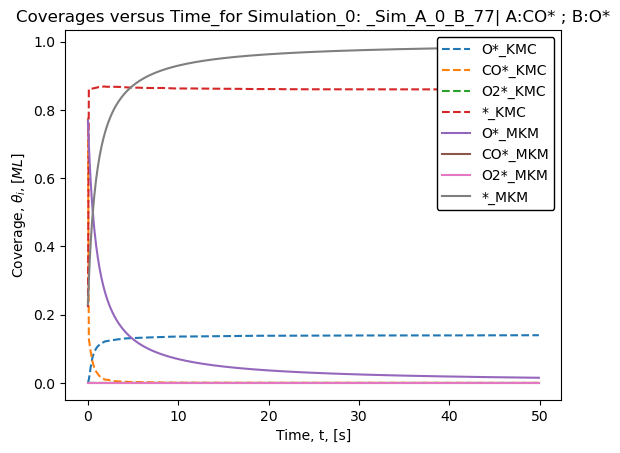

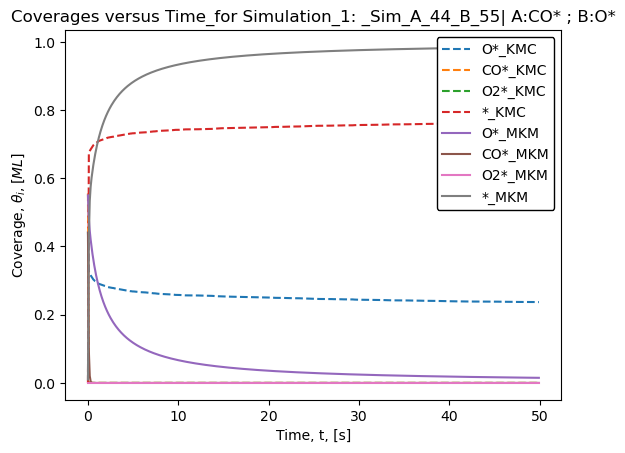

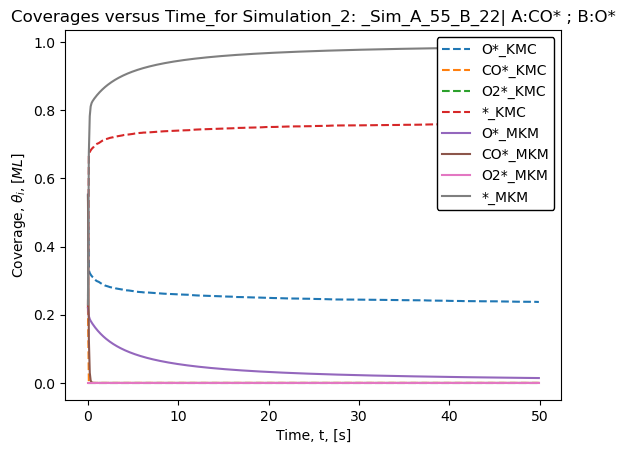

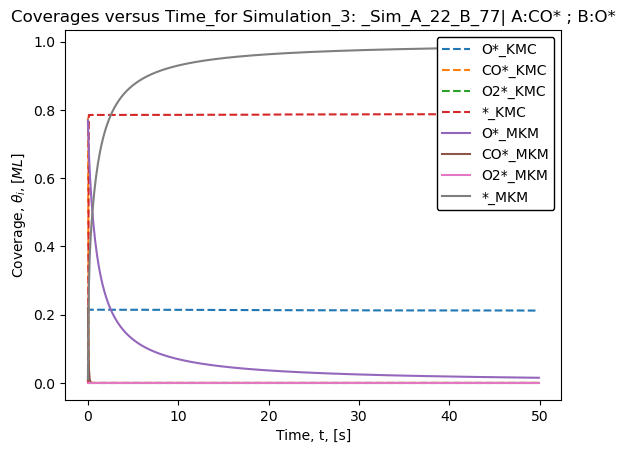

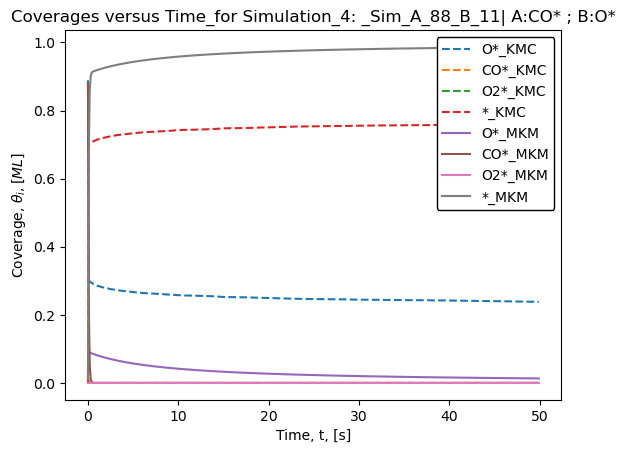

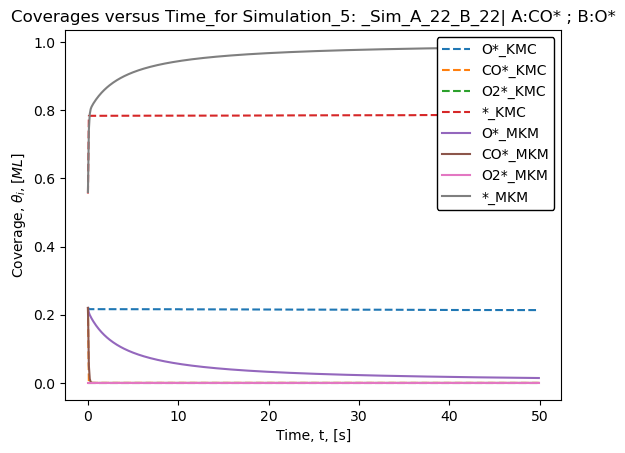

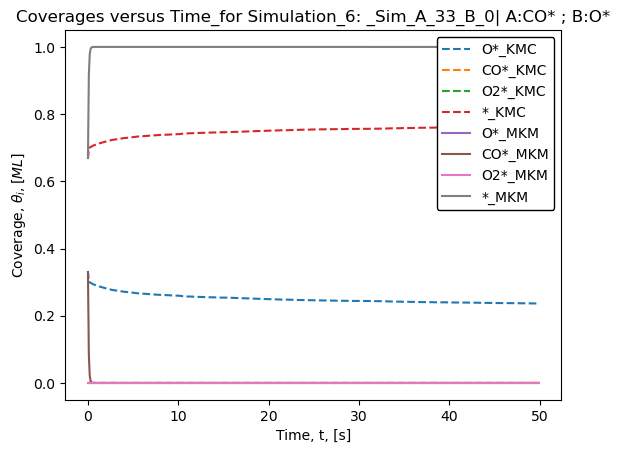

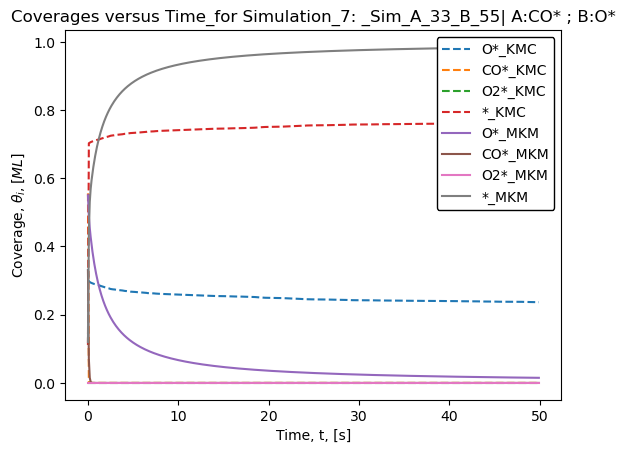

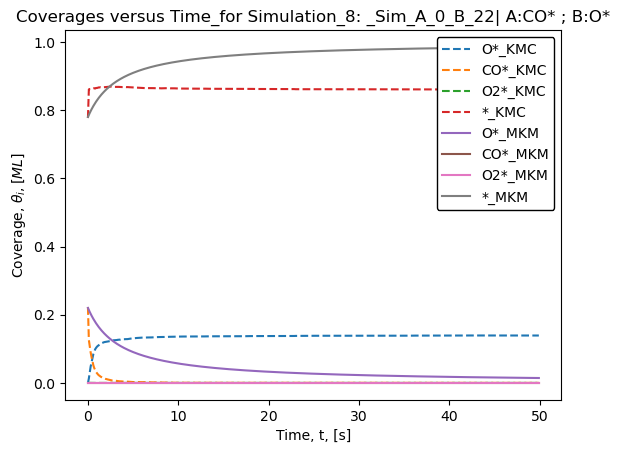

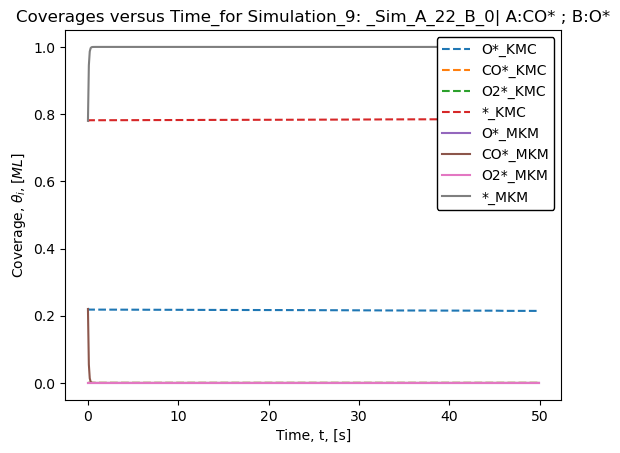

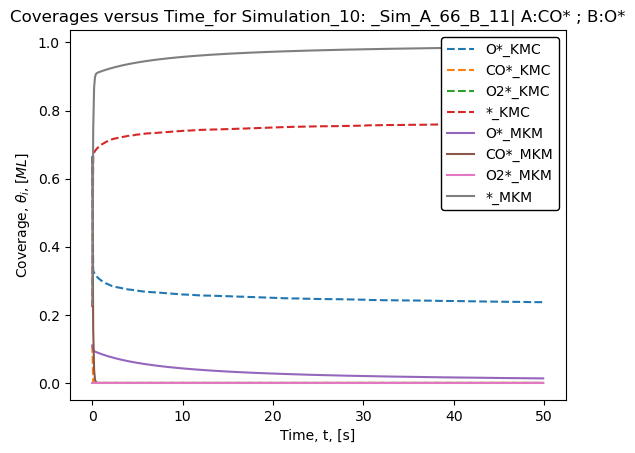

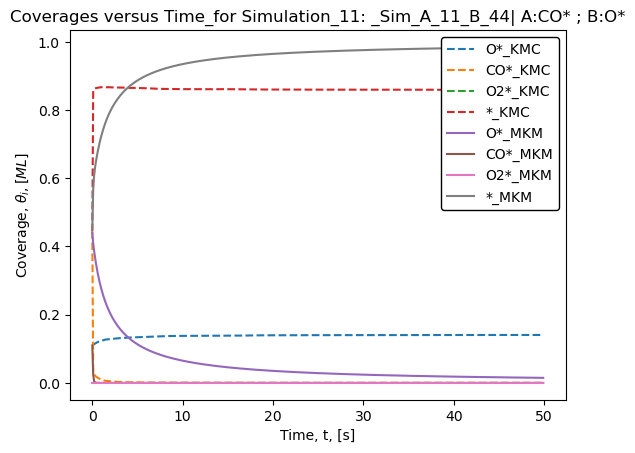

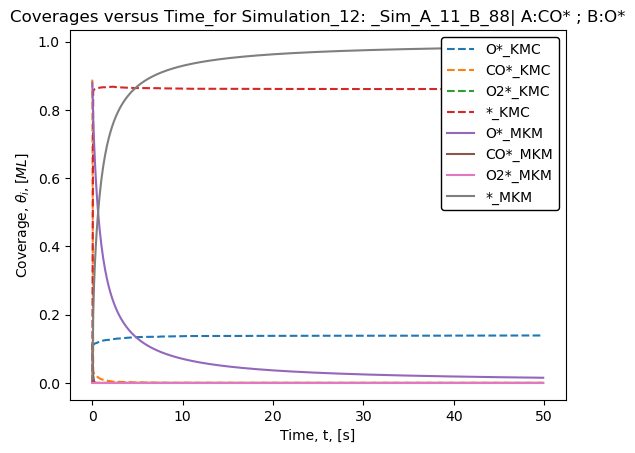

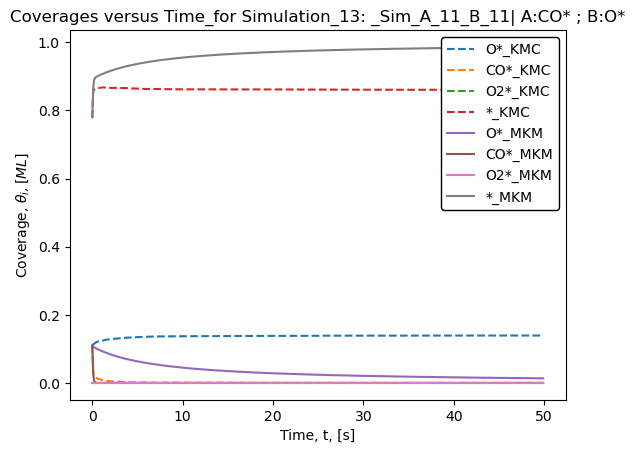

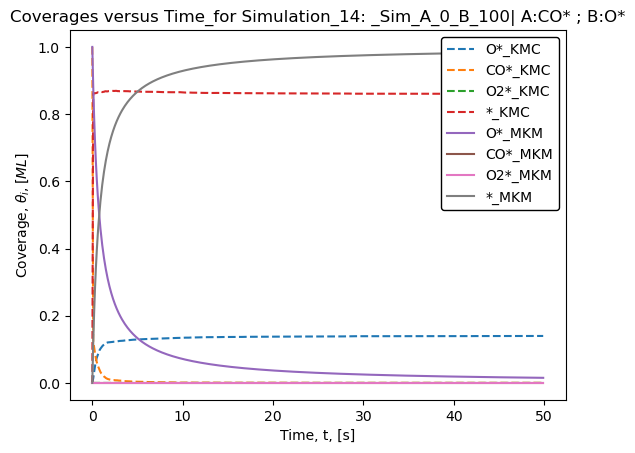

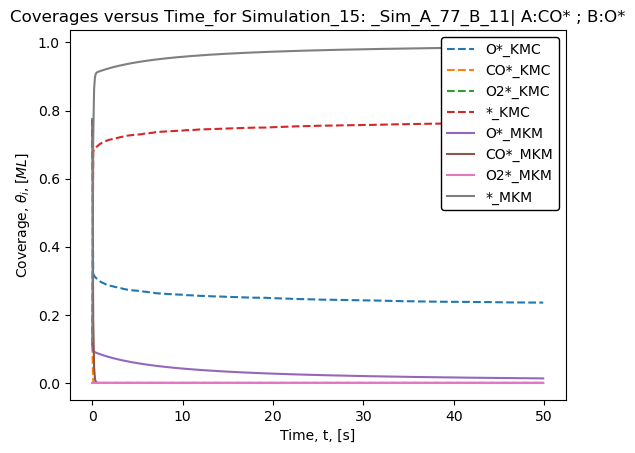

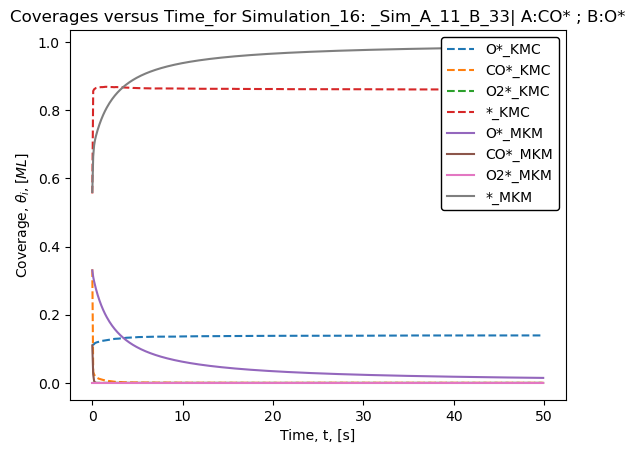

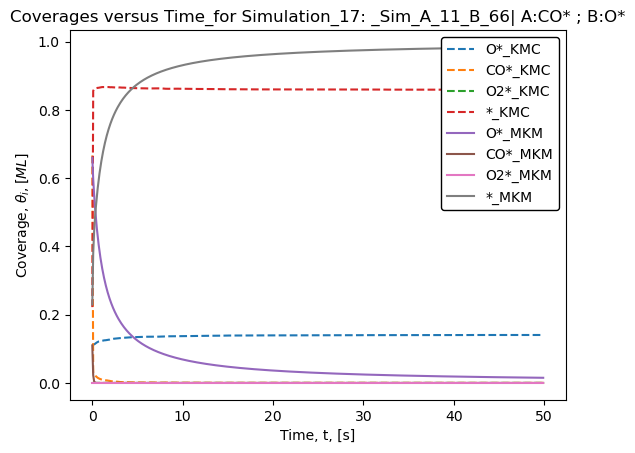

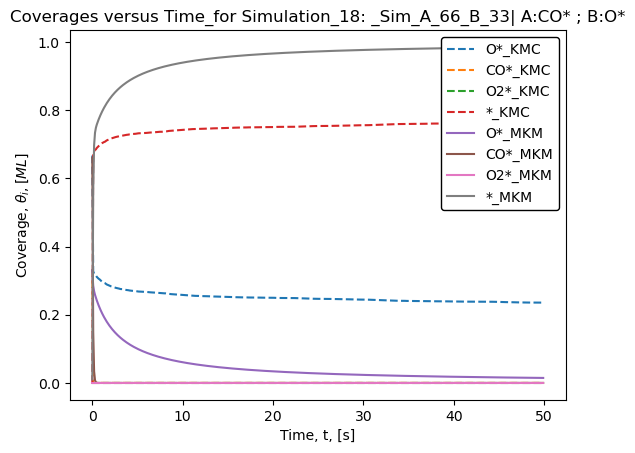

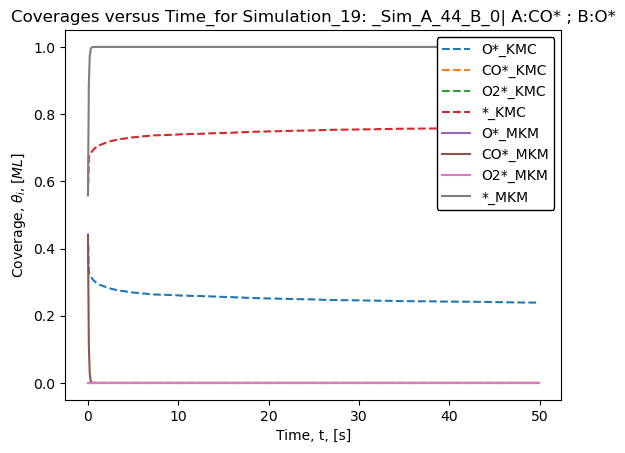

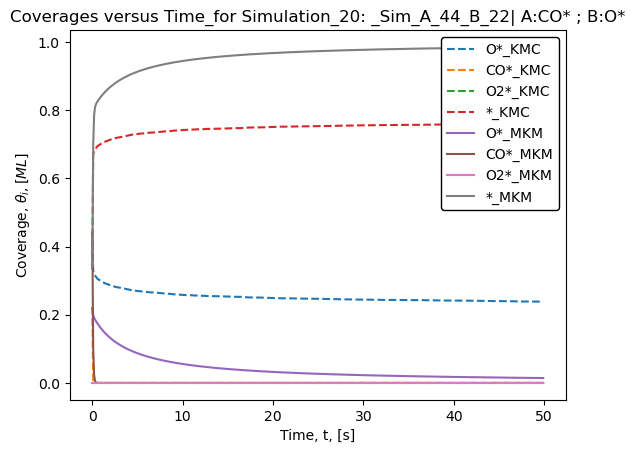

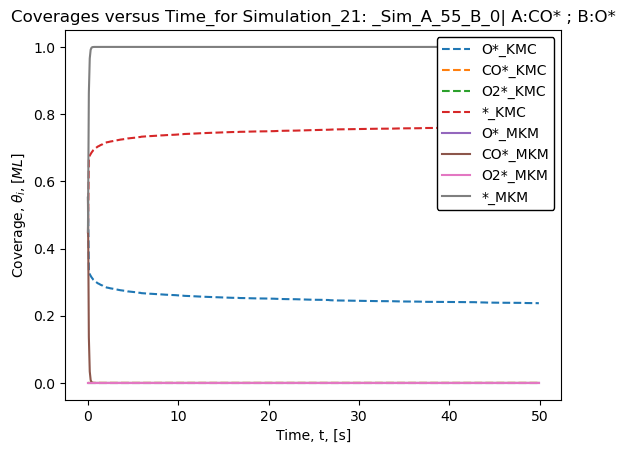

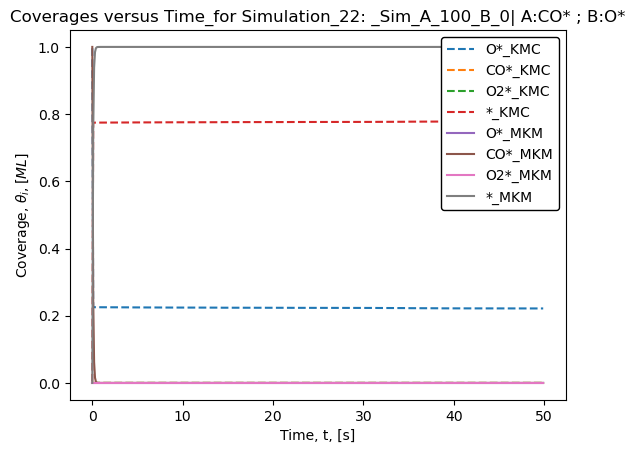

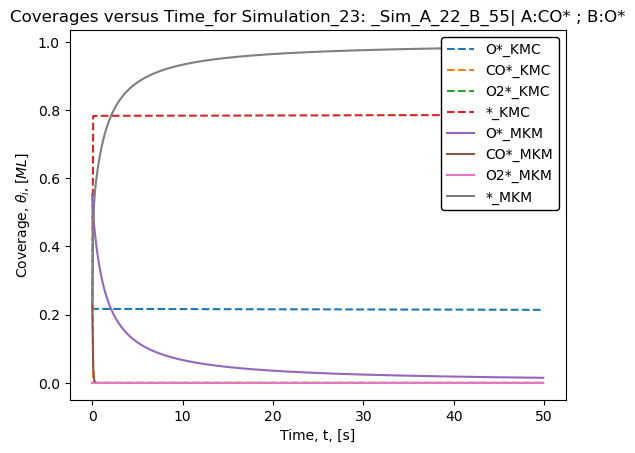

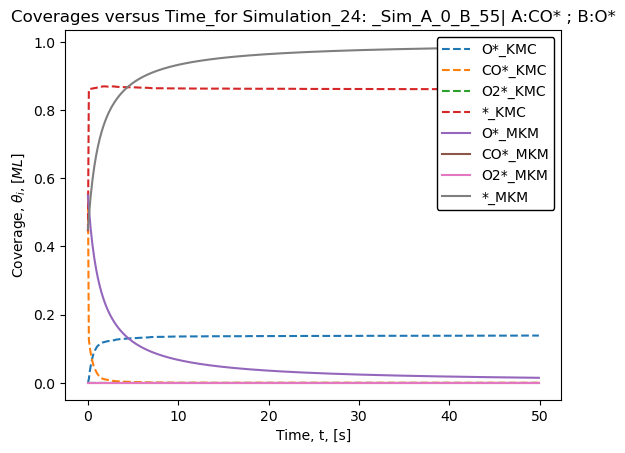

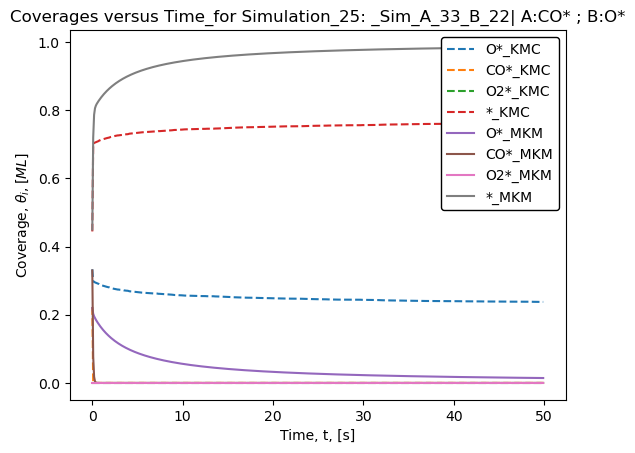

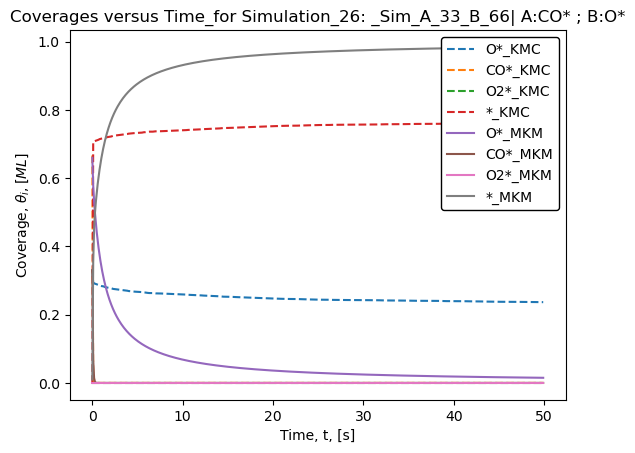

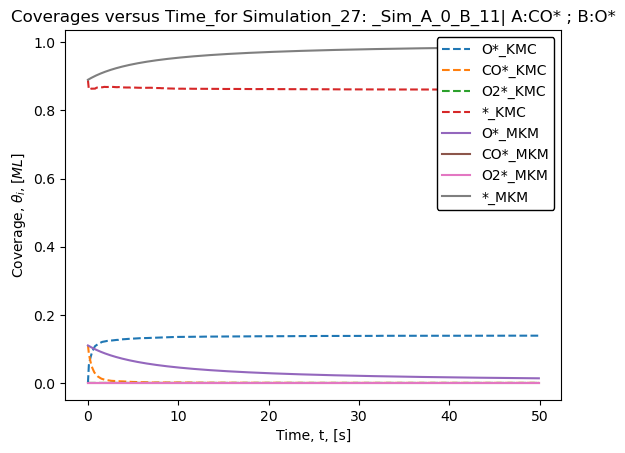

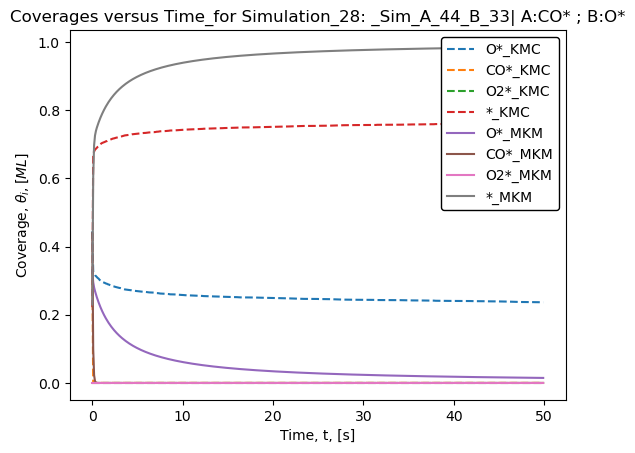

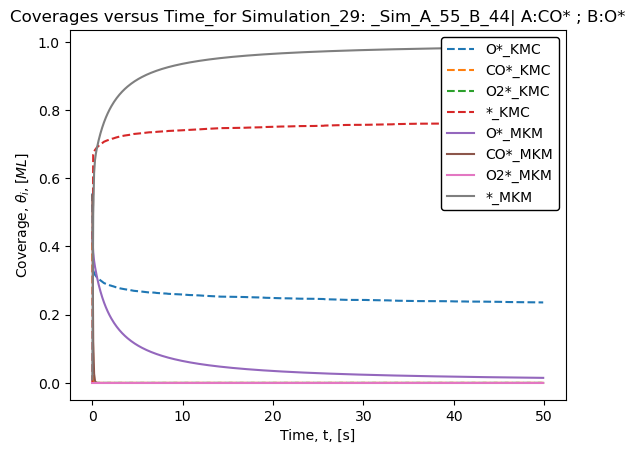

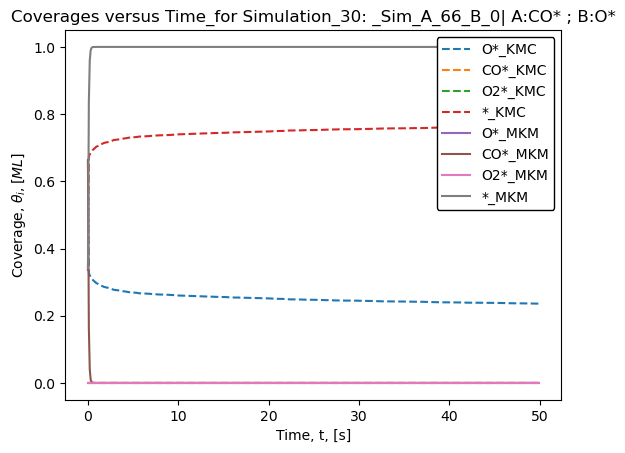

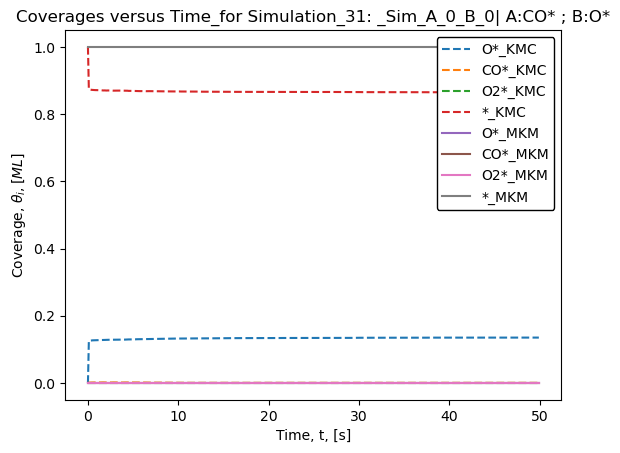

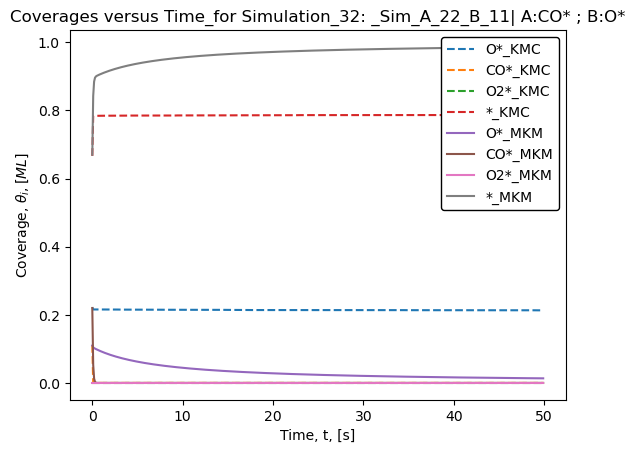

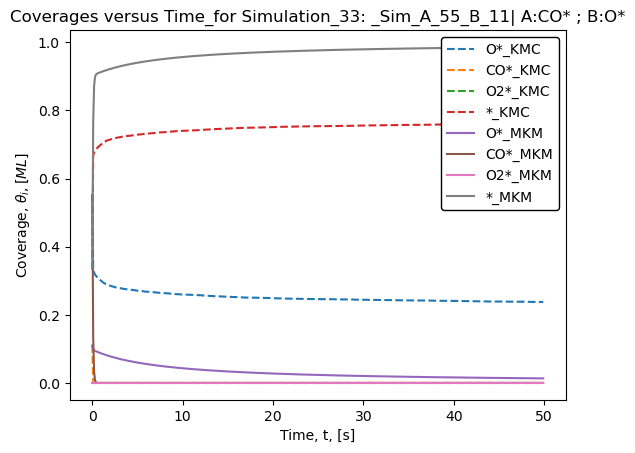

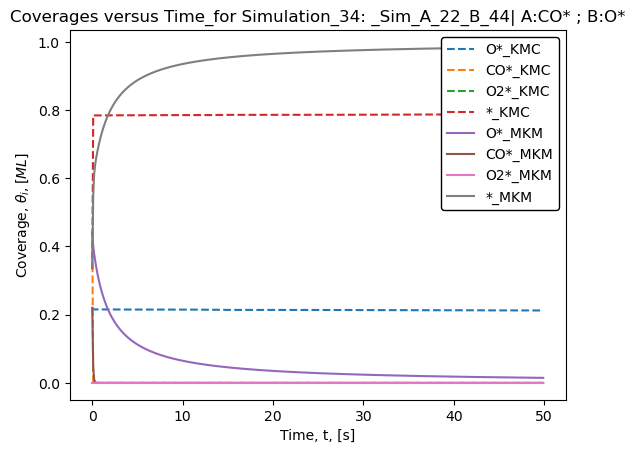

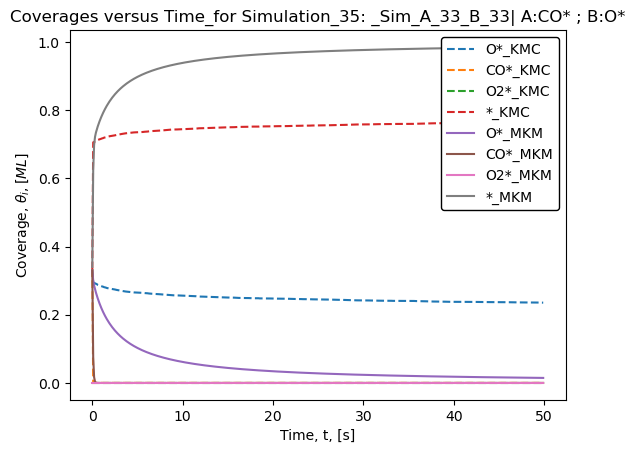

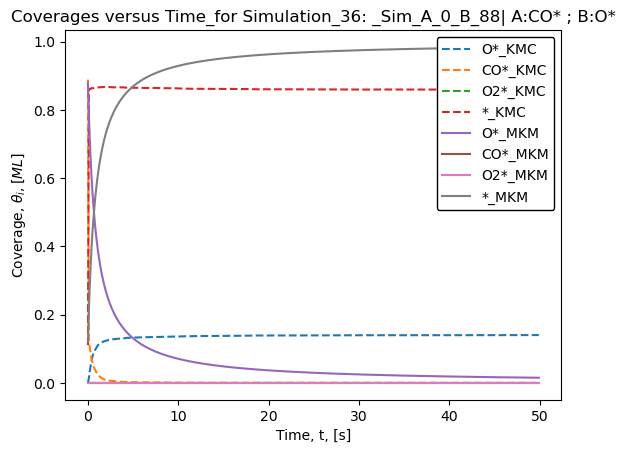

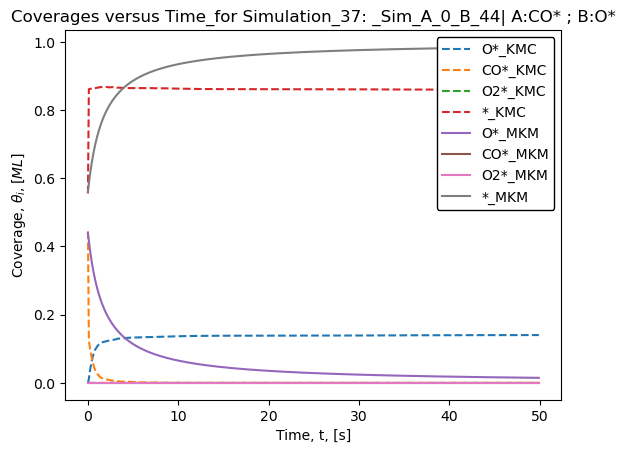

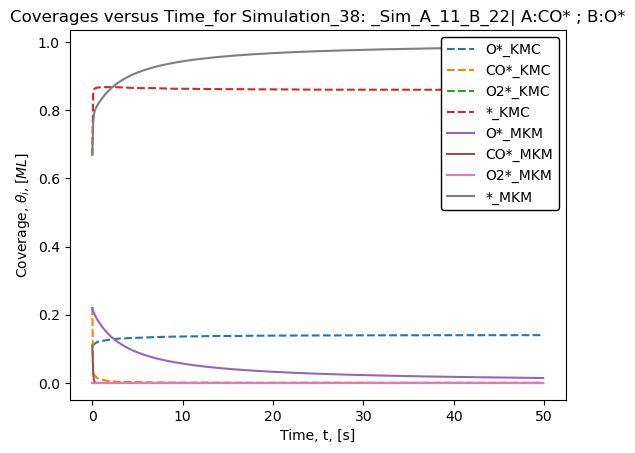

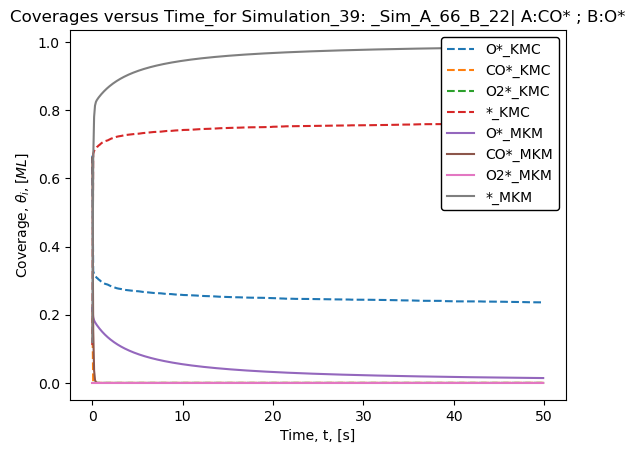

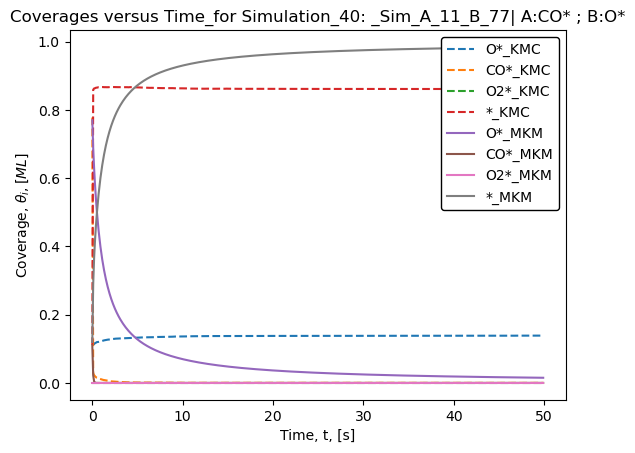

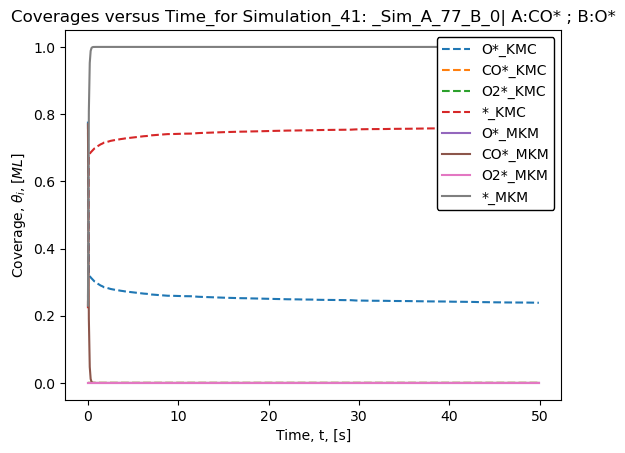

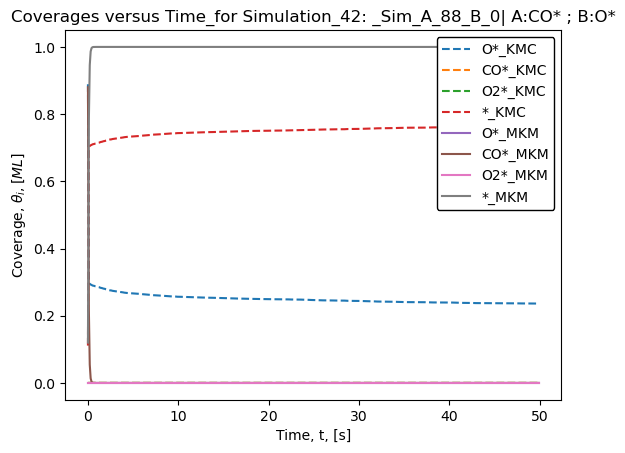

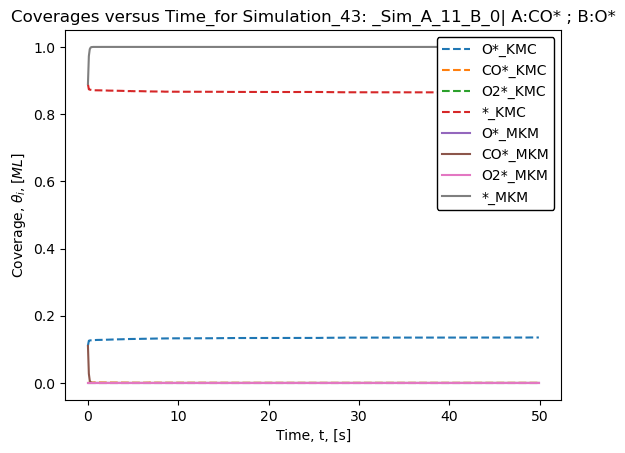

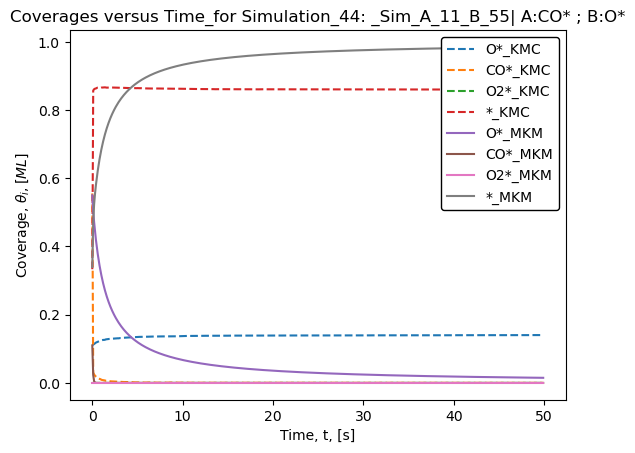

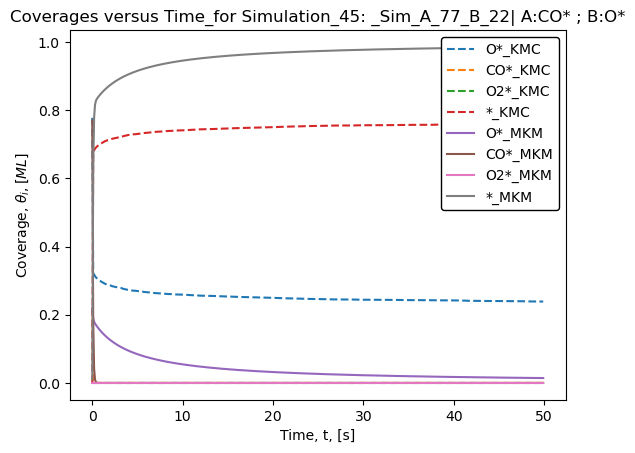

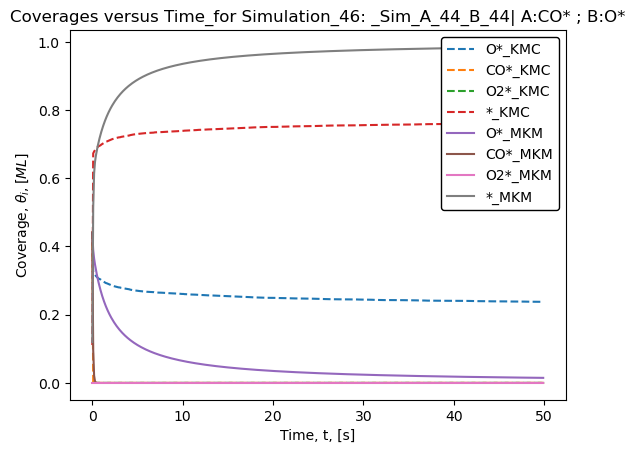

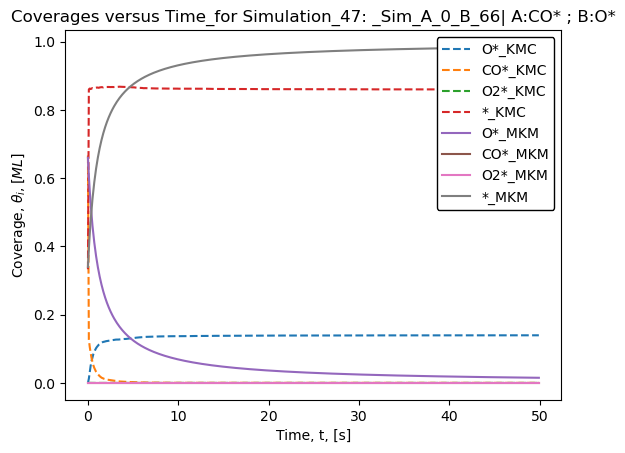

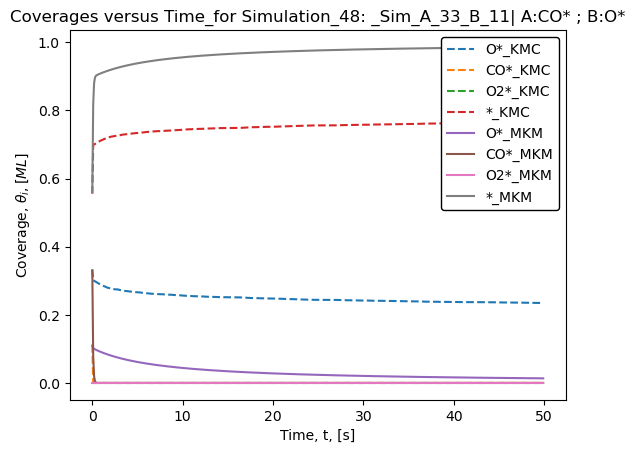

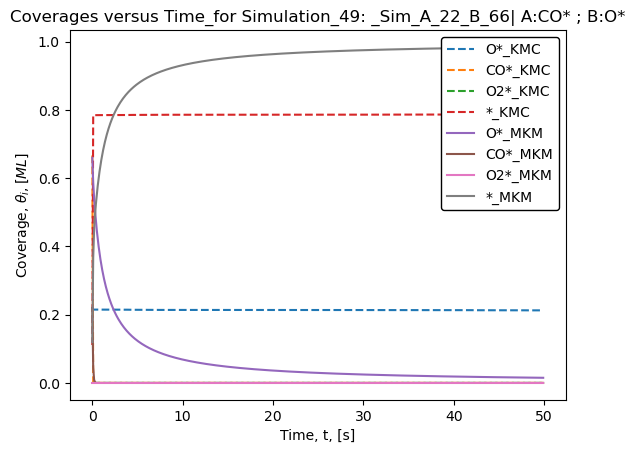

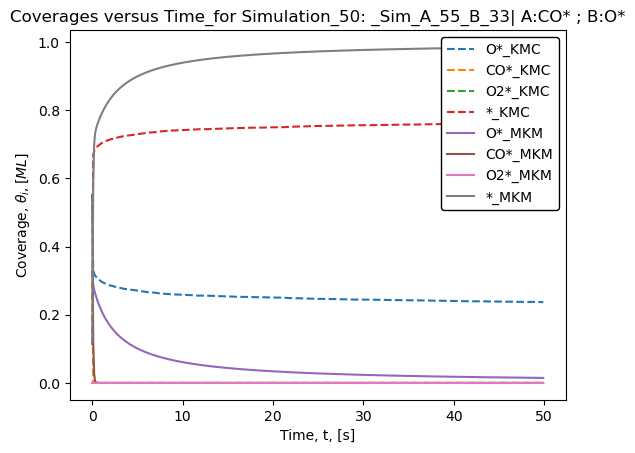

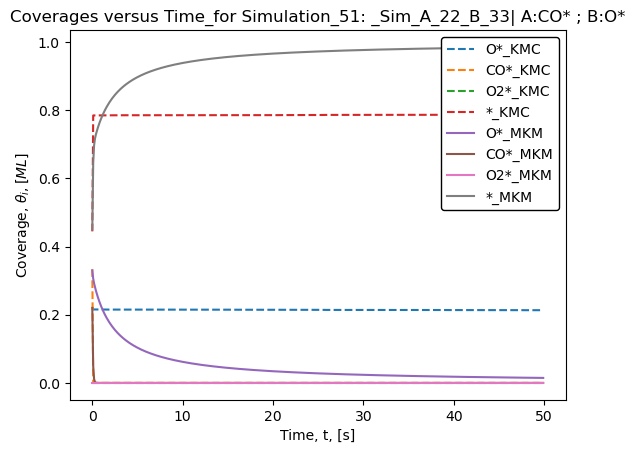

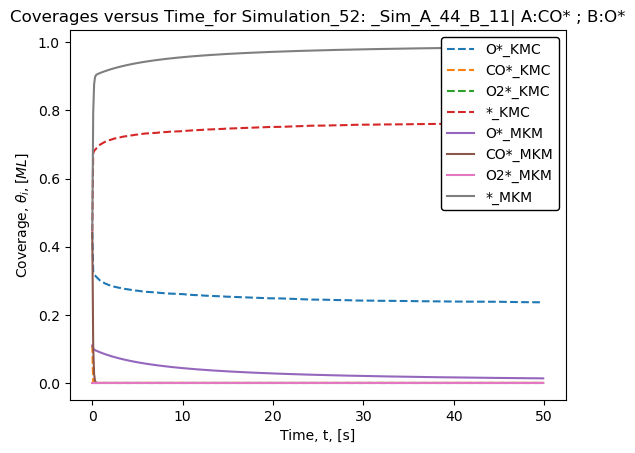

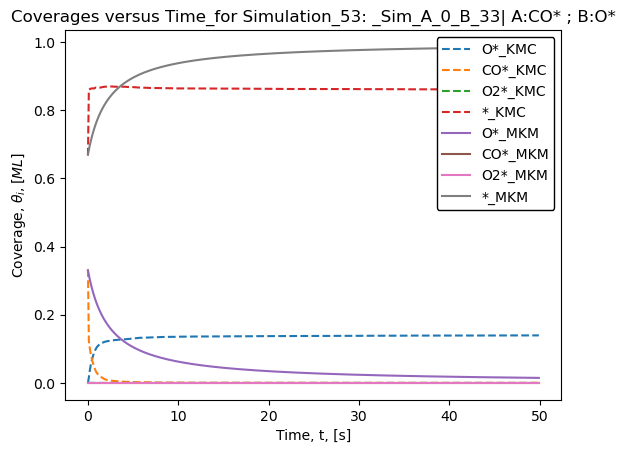

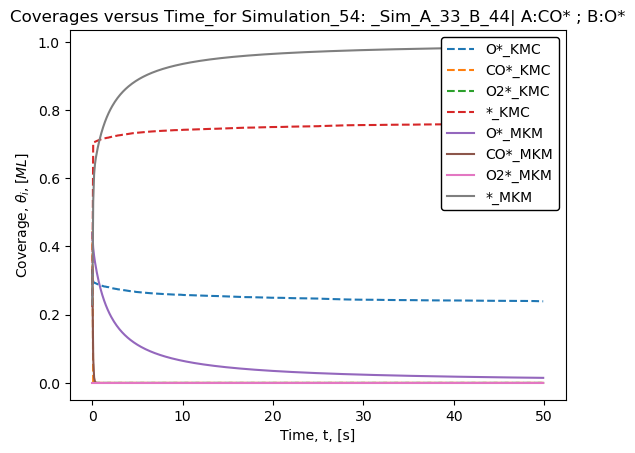

In [26]:
%%time
#Part 1: Choose the feature of which you we will compare the k-opt values

# Comp = 'iRates'
Comp = 'Covg'

print('Comparison of KMC vs fitted-k MKM results for' + Comp)

#Part 2: Plot comparison results for fitting analysis
for i in np.arange(len(set(out_df['Sim_ndex']))): #For each simulation:
        #Extracting KMC results: ------------------------------------------------
        df = out_df.loc[out_df['Sim_ndex'] == str(i)] #Extracting dataframe only corresponding to simulation i
        kmc_dat = df[[col for col in df if 'KMC_'+Comp in col]].to_numpy() #Extracting KMC comp data as array
        Time = df['Time'].to_numpy()

        #Plotting KMC result : ------------------------------------------------          
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        for i in np.arange(len(kmc_dat[0,:])):
            ax.plot(Time, kmc_dat[:,i],'--')
                        
        if Comp =='iRates':
            leg_nd = (o.iloc[0,Gspecies].tolist())
            ax.set_ylim([-0.2,0.2])
        elif Comp == 'Covg':
            leg_nd = (o.iloc[0,Sspecies].tolist())
            
        ax.set_xlabel('Time, t, [s]')
        if Comp =='iRates':
            ax.set_ylabel(r"Rates of Production, $R_i$")
            ax.set_title('Rates of production versus Time_ for Simulation_'+ df['Sim_ndex'].iloc[i] +': _'+df['Sim_names'].iloc[0]+'| A:CO* ; B:O*')
        elif Comp == 'Covg':
            ax.set_ylabel(r"Coverage, $\theta_i, [ML]$")
            ax.set_title('Coverages versus Time_for Simulation_'+ df['Sim_ndex'].iloc[i] +': _'+df['Sim_names'].iloc[0]+'| A:CO* ; B:O*')
        
        
        #Extracting MKM results: ------------------------------------------------
        mkm_dat = df[[col for col in df if 'MKM_'+Comp in col]].to_numpy() #Extracting MKM comp data as array
        Time = df['Time'].to_numpy()
            
            
        #Adding to the plot, MKM result : ------------------------------------------------     
        for i in np.arange(len(mkm_dat[0,:])):
            ax.plot(Time, mkm_dat[:,i])
        
        #Plotting all the legends together
        ax.legend([f"{string}_KMC" for string in leg_nd]+[f"{string}_MKM" for string in leg_nd],fontsize=10, loc='upper right',facecolor='white', edgecolor ='black', framealpha=1)


## Dropping KMC columns to clean up ML dataset

In [29]:
out_df = out_df[out_df.columns.drop(list(out_df.filter(regex='KMC_')))]
out_df

,Sim_ndex,Sim_names,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.0,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00
1,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.1,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10
2,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.2,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10
3,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.3,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10
4,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.4,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.5,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11
27496,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.6,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11
27497,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.7,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11
27498,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.8,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11


***
<a id="2.3"></a> 
## 2.C  Creating Features:
<a href="#top">Back to top</a>

<a id="2.3.2"></a> 
## 2.C.1  Percent difference
<a href="#top">Back to top</a>

$$ p_{diff} = \frac{|r_{MKM}-r_{KMC}|}{\frac{(r_{MKM}+r_{KMC})}{2}} $$

In [30]:
rx,ry,rz = np.shape(data_KMC_dict['iRates'])
P_diff = np.zeros((rx,ry,rz)) 

In [31]:
import math
MKM_values = data_MKM_dict['iRates']
KMC_values = data_KMC_dict['iRates']

for i in np.arange(rx):
    for j in np.arange(ry):
        for k in np.arange(rz):
            mkmr = KMC_values[i,j,k]
            kmcr = MKM_values[i,j,k]      
            #Preventing nan
            if float(mkmr) == 0:
                mkmr = 1e-20
            if float(kmcr) == 0:
                kmcr = 1e-20
            val = abs(mkmr-kmcr)/((mkmr+kmcr)/2) 
            P_diff[i,j,k] = val
            if math.isinf(val) or math.isnan(val):
                raise Exception('ERROR: inf or nan is present')

<a id="2.3.1"></a> 
## 2.C.2  Log ratio correction factor
<a href="#top">Back to top</a>

$$ corr_{fac} = ln\frac{r_{KMC}}{r_{MKM}}$$

In [32]:
rx,ry,rz = np.shape(data_KMC_dict['iRates'])
Corr_fac = np.zeros((rx,ry,rz)) 

In [33]:
import math
MKM_values = data_MKM_dict['iRates']
KMC_values = data_KMC_dict['iRates']

for i in np.arange(rx):
    for j in np.arange(ry):
        for k in np.arange(rz):
            num = KMC_values[i,j,k]
            den = MKM_values[i,j,k]
            #Preventing log(0)
            if float(num) == 0:
                num = 1e-20
            if float(den) == 0:
                den = 1e-20
                
            frac = num/den
            if float(frac) < 0: #(i.e the rates are either being calculated as consumed versus produced)
                frac = abs(frac)
                
            val = np.log(frac)
            Corr_fac[i,j,k] = val
            if math.isinf(val) or math.isnan(val):
                raise Exception('ERROR: inf or nan is present')

# Adding Descriptors/Correction features

In [34]:
#Percent Diff
gs_names = (o.iloc[0,Gspecies].tolist())
for i in np.arange(n_gas_species):
    spec = gs_names[i]
    out_df['P_diff_'+spec] = pd.DataFrame(Tensor_To_Array(P_diff))[1+i]

#Log Correc
gs_names = (o.iloc[0,Gspecies].tolist())
for i in np.arange(n_gas_species):
    spec = gs_names[i]
    out_df['Corr_fac_'+spec] = pd.DataFrame(Tensor_To_Array(Corr_fac))[1+i]

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_13878/3495857364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['P_diff_'+spec] = pd.DataFrame(Tensor_To_Array(P_diff))[1+i]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_13878/3495857364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['P_diff_'+spec] = pd.DataFrame(Tensor_To_Array(P_diff))[1+i]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_13878/3495857364.py:5: SettingWithCopyWarning: 
A value is tr

In [35]:
out_df

,Sim_ndex,Sim_names,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2,P_diff_O2,P_diff_CO,P_diff_CO2,Corr_fac_O2,Corr_fac_CO,Corr_fac_CO2
0,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.0,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00,-1.998107,2.0,-2.000000,7.655673,21.761516,37.839296
1,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.1,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10,3.070805,2.0,1.999994,-1.555089,21.443650,13.342169
2,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.2,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10,4.029247,2.0,1.999997,-1.088957,18.809007,14.168048
3,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.3,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10,4.390661,2.0,1.999997,-0.983268,18.803472,14.057751
4,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.4,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10,4.168409,2.0,1.999997,-1.045447,18.669369,14.006284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.5,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11,1.154534,-2.0,2.000000,1.316708,-22.298886,-22.291064
27496,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.6,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11,0.607648,-2.0,2.000000,0.627454,-22.296969,-22.289161
27497,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.7,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11,1.159710,-2.0,2.000000,1.324488,-22.295055,-22.287263
27498,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.8,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11,0.614688,-2.0,2.000000,0.635220,-22.293144,-22.285368


***
<a id="2.5"></a> 
## 2.E  Extracting Full X (Feature) and Y(Target) datasets
<a href="#top">Back to top</a>

In [36]:
All_columns = out_df.columns.to_list()
target_columns = list(filter(lambda x: ('Corr') in x or ('P_diff') in x, All_columns))

input_columns = [colmn for colmn in All_columns if colmn not in target_columns]

In [37]:
X_all = out_df[input_columns] #Ignoring the first two columns(index and simulation name)

In [38]:
Y_all = out_df[['Sim_ndex','Sim_names']+target_columns]

In [39]:
X_all

,Sim_ndex,Sim_names,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.0,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00
1,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.1,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10
2,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.2,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10
3,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.3,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10
4,0,Sim_A_0_B_77,0.000000,0.777724,0.0,0.222276,0.4,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.5,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11
27496,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.6,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11
27497,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.7,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11
27498,54,Sim_A_33_B_44,0.333333,0.444444,0.0,0.222222,49.8,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11


***
<a id="2.6"></a> 
## 2.F  Performing Train/Test X and Y Split datasets
<a href="#top">Back to top</a>

In [40]:
import random
p_test = 0.1 #Percent test data
print('Percent of test data selected:',p_test*100,'%')


max_sim_number = int(X_all[input_columns[0]].iloc[-1]) #MAx_number of simulations present #Count is starting from 0
n_test_sim = int(p_test*max_sim_number) #Number of simulations being used as test
sim_nums = list(set(X_all['Sim_ndex'])) # List of unique simulation numbers

test_sims = random.sample(sim_nums,n_test_sim) #Random sim_numbers for testing
print('\n','The list of simulations used in the test dataset:\n',test_sims)

Percent of test data selected: 10.0 %

 The list of simulations used in the test dataset:
 ['31', '2', '3', '53', '21']


In [41]:
X_test = X_all.loc[X_all['Sim_ndex'].isin(test_sims)]
Y_test = Y_all.loc[Y_all['Sim_ndex'].isin(test_sims)]

X_train = X_all[~X_all['Sim_ndex'].isin(test_sims)]
Y_train = Y_all[~Y_all['Sim_ndex'].isin(test_sims)]

In [42]:
#Making sure no null values are present
P_diff = [string for string in All_columns if string.startswith("P_diff_")]#Extracting all different forms of P_diff
Y_all[['Sim_ndex'] +P_diff].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27500 entries, 0 to 27499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sim_ndex    27500 non-null  object 
 1   P_diff_O2   27500 non-null  float64
 2   P_diff_CO   27500 non-null  float64
 3   P_diff_CO2  27500 non-null  float64
dtypes: float64(3), object(1)
memory usage: 859.5+ KB


In [43]:
#REMOVING THE SIM_NDEX AND SIM_NAMES COLUMNS\
X_test = X_test.drop(columns=['Sim_ndex','Sim_names'])
Y_test = Y_test.drop(columns=['Sim_ndex','Sim_names'])

X_train = X_train.drop(columns=['Sim_ndex','Sim_names'])
Y_train = Y_train.drop(columns=['Sim_ndex','Sim_names'])

In [44]:
X_train

,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0.000000,0.777724,0.0,0.222276,0.0,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00
1,0.000000,0.777724,0.0,0.222276,0.1,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10
2,0.000000,0.777724,0.0,0.222276,0.2,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10
3,0.000000,0.777724,0.0,0.222276,0.3,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10
4,0.000000,0.777724,0.0,0.222276,0.4,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
27495,0.333333,0.444444,0.0,0.222222,49.5,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11
27496,0.333333,0.444444,0.0,0.222222,49.6,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11
27497,0.333333,0.444444,0.0,0.222222,49.7,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11
27498,0.333333,0.444444,0.0,0.222222,49.8,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11


In [45]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 27499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_diff_O2     25000 non-null  float64
 1   P_diff_CO     25000 non-null  float64
 2   P_diff_CO2    25000 non-null  float64
 3   Corr_fac_O2   25000 non-null  float64
 4   Corr_fac_CO   25000 non-null  float64
 5   Corr_fac_CO2  25000 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


In [46]:
X_train

,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0.000000,0.777724,0.0,0.222276,0.0,0.770000,0.000000e+00,0.000000e+00,0.230000,-0.000019,-3.411070e-09,0.000000e+00
1,0.000000,0.777724,0.0,0.222276,0.1,0.699547,2.035842e-10,1.059528e-07,0.300453,0.319863,-1.623204e-09,4.354791e-10
2,0.000000,0.777724,0.0,0.222276,0.2,0.640949,2.918665e-10,8.890645e-08,0.359051,0.268392,-1.263881e-09,5.720233e-10
3,0.000000,0.777724,0.0,0.222276,0.3,0.591420,3.531934e-10,7.566852e-08,0.408580,0.228421,-1.145102e-09,6.387267e-10
4,0.000000,0.777724,0.0,0.222276,0.4,0.549014,4.005688e-10,6.518790e-08,0.450986,0.196775,-1.114819e-09,6.724610e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
27495,0.333333,0.444444,0.0,0.222222,49.5,0.014989,1.046414e-09,7.493680e-11,0.985011,0.000145,-4.833741e-11,4.796075e-11
27496,0.333333,0.444444,0.0,0.222222,49.6,0.014960,1.046451e-09,7.475044e-11,0.985040,0.000145,-4.824480e-11,4.786960e-11
27497,0.333333,0.444444,0.0,0.222222,49.7,0.014931,1.046489e-09,7.456515e-11,0.985069,0.000144,-4.815255e-11,4.777880e-11
27498,0.333333,0.444444,0.0,0.222222,49.8,0.014902,1.046526e-09,7.438091e-11,0.985098,0.000144,-4.806065e-11,4.768835e-11


In [47]:
Y_train

,P_diff_O2,P_diff_CO,P_diff_CO2,Corr_fac_O2,Corr_fac_CO,Corr_fac_CO2
0,-1.998107,2.0,-2.000000,7.655673,21.761516,37.839296
1,3.070805,2.0,1.999994,-1.555089,21.443650,13.342169
2,4.029247,2.0,1.999997,-1.088957,18.809007,14.168048
3,4.390661,2.0,1.999997,-0.983268,18.803472,14.057751
4,4.168409,2.0,1.999997,-1.045447,18.669369,14.006284
...,...,...,...,...,...,...
27495,1.154534,-2.0,2.000000,1.316708,-22.298886,-22.291064
27496,0.607648,-2.0,2.000000,0.627454,-22.296969,-22.289161
27497,1.159710,-2.0,2.000000,1.324488,-22.295055,-22.287263
27498,0.614688,-2.0,2.000000,0.635220,-22.293144,-22.285368


***
<a id="3"></a> 
## 3. MODELLING
<a href="#top">Back to top</a>

***
<a id="4"></a> 
## 4. Describing Possible Machine Learning Model Algorithms
<a href="#top">Back to top</a>

In [48]:
def ML_model(algorithm="XGBoost", X_train = X_train, Y_train = Y_train):
    
    #XGBoost Algorithm
    #https://xgboost.readthedocs.io/en/stable/python/python_api.html
    if algorithm=="XGBoost":  
        import xgboost as xgb

        reg = xgb.XGBRegressor(booster='gbtree',    
                               n_estimators=1500,
                               objective='reg:squarederror',
                               max_depth=20,
                               learning_rate=0.01)
        reg.fit(X_train, Y_train,
                eval_set=[(X_train, Y_train)],
                verbose=False)
    
    #Artificial Neural Network
    #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
    elif algorithm=="ANN":
        from sklearn.neural_network import MLPRegressor
        No_H_nodes_per_layer = 128
        print('Number of Hidden layer nodes per layer : ',No_H_nodes_per_layer)
        No_H_layers = 4
        print('Number of Hidden layers: ',No_H_layers)

        hidden_layers = No_H_nodes_per_layer*np.ones(No_H_layers) 
        hidden_layer_sizes = tuple(tuple(int(item) for item in hidden_layers))
        reg = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                            activation='relu', 
                            solver='adam')
#                            ,random_state=42, 
#                             max_iter=300)

        reg.fit(X_train, Y_train)
    
    #K-Nearest Neighbor
    #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
    elif algorithm=="KNN":
        from sklearn.neighbors import KNeighborsRegressor

        reg = KNeighborsRegressor(n_neighbors=50, weights='distance',p=1)
        reg.fit(X_train, Y_train)
    
    #RandomForest 
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    elif algorithm=='RandomForest':
        from sklearn.ensemble import RandomForestRegressor
        
        reg = RandomForestRegressor(n_estimators=1000, random_state=42)

        reg.fit(X_train, Y_train)
        
        print('Features:',X_train.columns)
        
        print('\nFeature Importance:\n',reg.feature_importances_) #Shows which features are chosen most when doing splits #gives the most information
        
    elif algorithm=='DecisionTree':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor()#criterion='poisson',max_depth=20,min_samples_leaf=10,min_samples_split=20
        
        reg.fit(X_train, Y_train)
        
        print('Features:',X_train.columns)
        
        print('\nFeature Importance:\n',reg.feature_importances_) #Shows which features are chosen most when doing splits #gives the most information

    return reg

***
<a id="5"></a> 
## 5. Selecting the Training Model
<a href="#top">Back to top</a>

In [60]:
import time
######### OPTIONS: 'XGBoost','ANN','KNN','RandomForest'#########
################################################################
ALGORITHM_NAME = "KNN"
################################################################

start_time = time.time()
reg = ML_model(algorithm = ALGORITHM_NAME)
end_time = time.time()

elapsed_time = end_time - start_time
print("\nElapsed Model Training Time: \n", elapsed_time, "seconds \n", elapsed_time/60, "minutes")


Elapsed Model Training Time: 
 0.0594792366027832 seconds 
 0.0009913206100463866 minutes


***
<a id="6"></a> 
## 6. Importing External/Experimental Data to be used in the model
<a href="#top">Back to top</a>

In [61]:
KMC_Data_EXP = pd.read_csv('KMC_NonDynamic_Data_iCovg_iRates_sw.csv')
KMC_Data_EXP_rates= KMC_Data_EXP.iloc[:,-n_gas_species:] #To be used to later to compare and asses ML prediction results

#Creating repeated init covs matrix
test_data_ini_cov = KMC_Data_EXP.iloc[0,1:5].values
test_data_time_interv = KMC_Data_EXP.iloc[:,0].values
matrix_test_data_ini_cov = np.empty((len(test_data_time_interv),len(test_data_ini_cov)))
for i in np.arange(len(test_data_time_interv)):
    matrix_test_data_ini_cov[i] = test_data_ini_cov


***
<a id="6.1"></a> 
## 6.A Generating corresponding MF-MKModel
<a href="#top">Back to top</a>

In [62]:
%%time
from main import *
MKM_test_inp = MKModel('Atomic_sw.csv','Stoich_sw.csv','Param_sw.csv')
MKM_test_inp.set_rxnconditions(Pr=[(1.0e-4*0.1),(1.0e-4*1.0e-5), 0]) #From KMC #Make sure it matches 02 CO CO2

MKM_test_inp.set_limits_of_integration(Ti=float(KMC_Data_EXP['Time'].head(1)),Tf=float(KMC_Data_EXP['Time'].tail(1)))
MKM_test_inp.ODE_Tolerances(Dplace=50,reltol=1e-5,abstol=1e-8)
MKM_test_inp.k = params #From fitting or external

MKM_Covg_test_inp = np.zeros((len(test_data_time_interv),len(test_data_ini_cov))) #CO*, O*, O2*, *
MKM_Rates_test_inp = np.zeros((len(test_data_time_interv),n_gas_species)) #CO, O2, CO2

MKM_test_inp.set_initial_coverages(init=test_data_ini_cov)

sola,solta = MKM_test_inp.solve_coverage(Tf_eval=test_data_time_interv,plot=False)
MKM_Covg_test_inp = sola #Coverage profile matrix

solb,soltb = MKM_test_inp.solve_rate_production(Tf_eval=test_data_time_interv,plot=False)
MKM_Rates_test_inp = (solb[:,0:n_gas_species])


Mass is conserved. 



<timed exec>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


CPU times: user 566 ms, sys: 21.1 ms, total: 587 ms
Wall time: 619 ms


In [63]:
Exp_surf_name = KMC_Data_EXP.columns.to_list()[1:n_surf_species+1]
Exp_gas_name = [i[-2:] for i in KMC_Data_EXP.columns.to_list()[n_surf_species+1:]]

In [64]:
Test_input = pd.DataFrame()

#Adding initial coverages
surf_names = Exp_surf_name
for i in np.arange(n_surf_species):
    spec = surf_names[i]
    Test_input['Init_Covg_'+spec] = pd.DataFrame(matrix_test_data_ini_cov)[i]

#Adding Time
Test_input['Time'] = pd.DataFrame(test_data_time_interv)

#Adding coverage profiles of surface species
surf_names = Exp_surf_name
for i in np.arange(n_surf_species):
    spec = surf_names[i]
    Test_input['MKM_Covg_'+spec] = pd.DataFrame(MKM_Covg_test_inp)[i]
    
#Adding iRates profiles of gaseous species
gs_names = (o.iloc[0,Gspecies].tolist())
for i in np.arange(n_gas_species):
    spec = gs_names[i]
    Test_input['MKM_iRates_'+spec] = pd.DataFrame(MKM_Rates_test_inp)[i]

In [65]:
Test_input.head(10)

,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.0000820673616999999989106238682771016086165...,-0.0000000148307412000000012141975095482813976...,0.0
1,0.0,0.0,0.0,1.0,0.1,1.315854e-07,6.950586e-10,2.696437e-11,1.000000,-0.0000006579288873892070697955288197679544491...,-0.0000000051594919955495353264415441187947849...,2.79663121497921748437487054978528134271126693...
2,0.0,0.0,0.0,1.0,0.2,2.631711e-07,9.484401e-10,2.696437e-11,1.000000,-0.0000006579286805166522546130203428799289989...,-0.0000000016338674056836671874788291038349894...,7.63227983582317603211383352281229578921446625...
3,0.0,0.0,0.0,1.0,0.3,3.947564e-07,9.634913e-10,2.696436e-11,1.000000,-0.0000006579283625938168320627432018301388395...,-0.0000000014244388612024450353268531770437956...,0.00000000000000116300909314193941196177528380...
4,0.0,0.0,0.0,1.0,0.4,5.263416e-07,9.785424e-10,2.696436e-11,0.999999,-0.0000006579280446709814095124660607803486801...,-0.0000000012150103167212179200912019320865525...,0.00000000000000157490215694797606162447009119...
5,0.0,0.0,0.0,1.0,0.5,6.579269e-07,9.935936e-10,2.696436e-11,0.999999,-0.0000006579277267481595394893449885359836139...,-0.0000000010055817722399957679392260052953586...,0.00000000000000199890717500042686194617570605...
6,0.0,0.0,0.0,1.0,0.6,7.895121e-07,1.008645e-09,2.696435e-11,0.999999,-0.0000006579274088253241169390678474861934545...,-0.0000000007961532277587719614260249724488151...,0.00000000000000243502414729929201014211843363...
7,0.0,0.0,0.0,1.0,0.7,9.210974e-07,1.023696e-09,2.696435e-11,0.999999,-0.0000006579270909025022469159467752418283882...,-0.0000000005867246832775498092740490456576212...,0.00000000000000288325307384457150621229827394...
8,0.0,0.0,0.0,1.0,0.8,1.052683e-06,1.038747e-09,2.696435e-11,0.999999,-0.0000006579267729796668243656696341920382288...,-0.0000000003772961387963226940383978007003781...,0.00000000000000334359395463626613901762044799...
9,0.0,0.0,0.0,1.0,0.9,1.184268e-06,1.053798e-09,2.696434e-11,0.999999,-0.0000006579264550568314018153924931422480694...,-0.0000000001678675943151005418864218739091843...,0.00000000000000381604678967437472526672712426...


***
<a id="6.2"></a> 
## 6.B Predicting Machine-Learned Mean-Field Corrections
<a href="#top">Back to top</a>

In [66]:
Test_input

,Init_Covg_O*,Init_Covg_CO*,Init_Covg_O2*,Init_Covg_*,Time,MKM_Covg_O*,MKM_Covg_CO*,MKM_Covg_O2*,MKM_Covg_*,MKM_iRates_O2,MKM_iRates_CO,MKM_iRates_CO2
0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.0000820673616999999989106238682771016086165...,-0.0000000148307412000000012141975095482813976...,0.0
1,0.0,0.0,0.0,1.0,0.1,1.315854e-07,6.950586e-10,2.696437e-11,1.000000,-0.0000006579288873892070697955288197679544491...,-0.0000000051594919955495353264415441187947849...,2.79663121497921748437487054978528134271126693...
2,0.0,0.0,0.0,1.0,0.2,2.631711e-07,9.484401e-10,2.696437e-11,1.000000,-0.0000006579286805166522546130203428799289989...,-0.0000000016338674056836671874788291038349894...,7.63227983582317603211383352281229578921446625...
3,0.0,0.0,0.0,1.0,0.3,3.947564e-07,9.634913e-10,2.696436e-11,1.000000,-0.0000006579283625938168320627432018301388395...,-0.0000000014244388612024450353268531770437956...,0.00000000000000116300909314193941196177528380...
4,0.0,0.0,0.0,1.0,0.4,5.263416e-07,9.785424e-10,2.696436e-11,0.999999,-0.0000006579280446709814095124660607803486801...,-0.0000000012150103167212179200912019320865525...,0.00000000000000157490215694797606162447009119...
...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.0,0.0,0.0,1.0,24.6,3.235360e-05,1.065822e-09,2.696373e-11,0.999968,-0.0000006572042033013044617664510701178360314...,-0.0000000000001093969223656711267432975073981...,0.00000000000010544192595939988853839257482650...
247,0.0,0.0,0.0,1.0,24.7,3.248504e-05,1.065822e-09,2.696373e-11,0.999968,-0.0000006571989874910714881019657231475245715...,-0.0000000000001079562499057121754162639846725...,0.00000000000010587031340077233406135202652803...
248,0.0,0.0,0.0,1.0,24.8,3.261649e-05,1.065822e-09,2.696373e-11,0.999967,-0.0000006571937716808385144374803761772131116...,-0.0000000000001065155774440988628641244065973...,0.00000000000010629870081275106494930756618859...
249,0.0,0.0,0.0,1.0,24.9,3.274794e-05,1.065822e-09,2.696373e-11,0.999967,-0.0000006571885558705964294655420711341503900...,-0.0000000000001050749049824933685018411913709...,0.00000000000010672708819533611906758264441674...


In [67]:
Test_output = reg.predict(Test_input)

Pred_corr = Test_output[:,-len(Exp_gas_name):] #extracting correction factors  #O2 #CO #CO2

<a id="6.3"></a> 
## 6.C ML Correction to MF-MKModel
<a href="#top">Back to top</a>

In [68]:
#Calculating extracted ML predicted rates
ML_Rates_pred = np.zeros((len(test_data_time_interv),len(Exp_gas_name)))  #O2, #CO, CO2
for i in np.arange(np.shape(ML_Rates_pred)[0]):
    for j in np.arange(np.shape(ML_Rates_pred)[1]):
        ML_Rates_pred[i,j] = MKM_Rates_test_inp[i,j]*np.exp(Pred_corr[i,j])

<a id="6.4"></a> 
## 6.D Evaluating the ML model prediction
<a href="#top">Back to top</a>

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#Calculating the root mean squared of the test set
print('Root Mean Squared Error:\n',sqrt(mean_squared_error(KMC_Data_EXP_rates, ML_Rates_pred)))

Root Mean Squared Error:
 0.034288220295975336


<a id="6.5"></a> 
## 6.E Plotting
<a href="#top">Back to top</a>

<IPython.core.display.Javascript object>


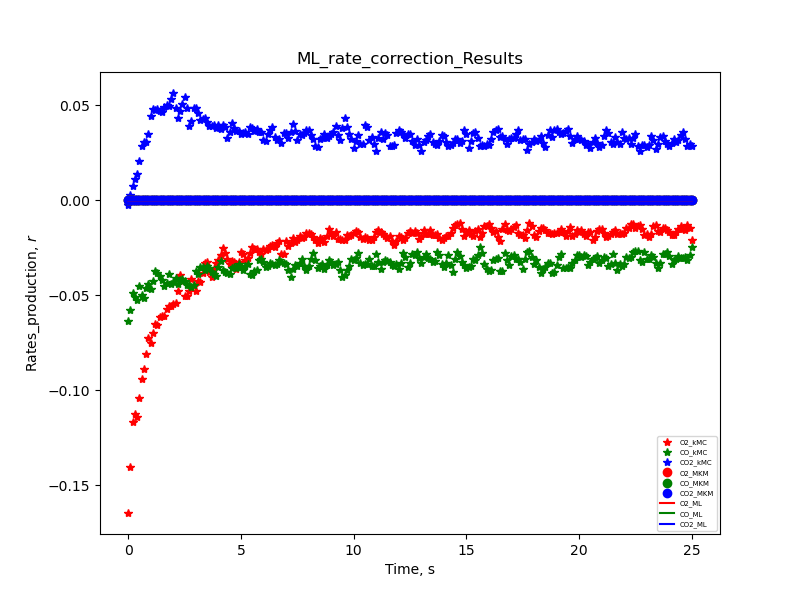

CPU times: user 33 ms, sys: 10.3 ms, total: 43.3 ms
Wall time: 44.8 ms


In [70]:
%%time
#%matplotlib notebook
plt.figure(figsize = (8, 6))
plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,0],'r*', label='O2_kMC')        
plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,1],'g*', label='CO_kMC') 
plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,2], 'b*', label='CO2_kMC') 

plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,0],'ro', label='O2_MKM')        
plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,1],'go', label='CO_MKM') 
plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,2], 'bo', label='CO2_MKM') 

plt.plot(test_data_time_interv, ML_Rates_pred[:,0],'r-', label='O2_ML')        
plt.plot(test_data_time_interv, ML_Rates_pred[:,1],'g-', label='CO_ML') 
plt.plot(test_data_time_interv, ML_Rates_pred[:,2], 'b-', label='CO2_ML') 

plt.xlabel('Time, s')
plt.ylabel("Rates_production, $r$")
plt.title('ML_rate_correction_Results')
# plt.ylim([-0.2,0.2])
plt.legend(fontsize=5, loc='best')
plt.show()

***
<a id="7"></a> 
## 7. Exploring and Evaluating possible ML options
<a href="#top">Back to top</a>
***

--------------------------------------------------
Algorithm: XGBoost 


Elapsed Model Training Time: 
 758.7340009212494 seconds 
 12.645566682020823 minutes

Root Mean Squared Error when using XGBoost :
 0.015259350393940527


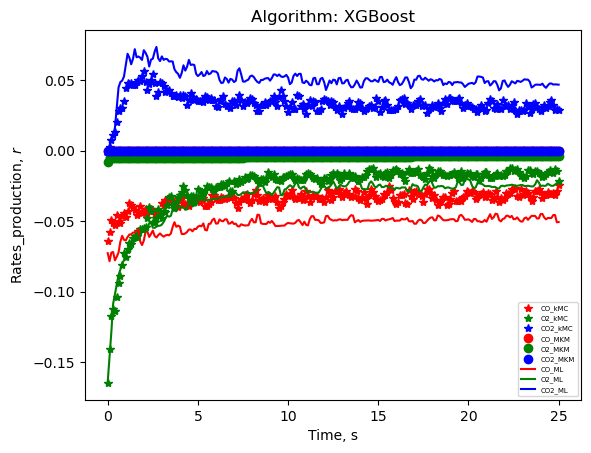

--------------------------------------------------
Algorithm: ANN 

Number of Hidden layer nodes per layer :  128
Number of Hidden layers:  4

Elapsed Model Training Time: 
 798.3743278980255 seconds 
 13.306238798300425 minutes

Root Mean Squared Error when using ANN :
 0.06703279374857071


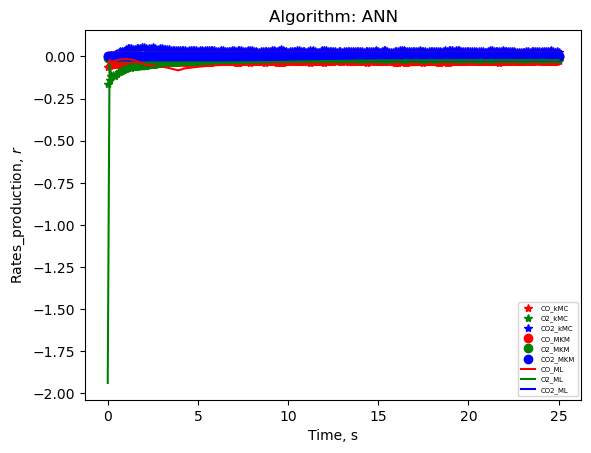

--------------------------------------------------
Algorithm: KNN 


Elapsed Model Training Time: 
 798.8009920120239 seconds 
 13.313349866867066 minutes

Root Mean Squared Error when using KNN :
 0.015459796650543143


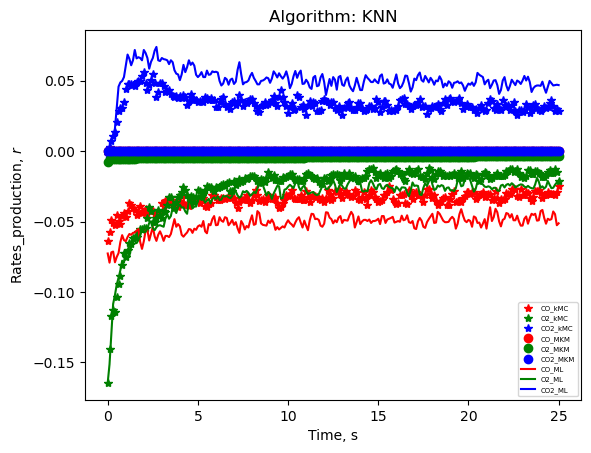

--------------------------------------------------
Algorithm: RandomForest 

Features: Index(['Init_Covg_CO*', 'Init_Covg_O*', 'Init_Covg_O2*', 'Init_Covg_*', 'Time',
       'MKM_Covg_CO*', 'MKM_Covg_O*', 'MKM_Covg_O2*', 'MKM_Covg_*',
       'MKM_iRate_CO', 'MKM_iRate_O2', 'MKM_iRate_CO2'],
      dtype='object')

Feature Importance:
 [0.02679002 0.2674524  0.         0.02046036 0.09714754 0.03283602
 0.10767654 0.         0.1367566  0.         0.12305702 0.1878235 ]

Elapsed Model Training Time: 
 942.8483459949493 seconds 
 15.714139099915823 minutes

Root Mean Squared Error when using RandomForest :
 0.015251661601720434


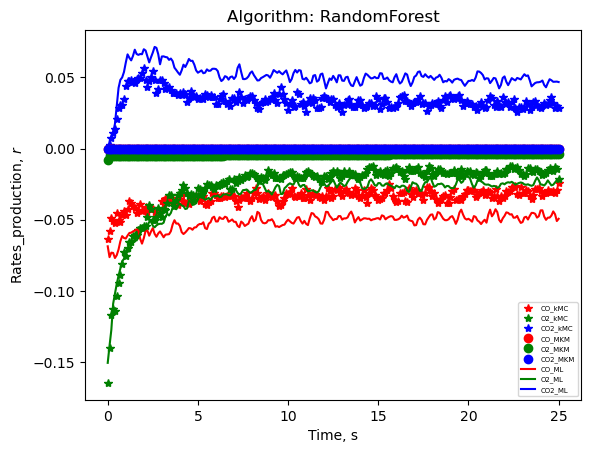

--------------------------------------------------
Algorithm: DecisionTree 

Features: Index(['Init_Covg_CO*', 'Init_Covg_O*', 'Init_Covg_O2*', 'Init_Covg_*', 'Time',
       'MKM_Covg_CO*', 'MKM_Covg_O*', 'MKM_Covg_O2*', 'MKM_Covg_*',
       'MKM_iRate_CO', 'MKM_iRate_O2', 'MKM_iRate_CO2'],
      dtype='object')

Feature Importance:
 [6.90156780e-03 1.97893199e-01 0.00000000e+00 1.70463329e-04
 1.91272340e-02 5.16520437e-02 6.44833873e-02 0.00000000e+00
 1.09854413e-02 0.00000000e+00 5.02518511e-01 1.46268152e-01]

Elapsed Model Training Time: 
 943.3590459823608 seconds 
 15.72265076637268 minutes

Root Mean Squared Error when using DecisionTree :
 0.015459796650546975


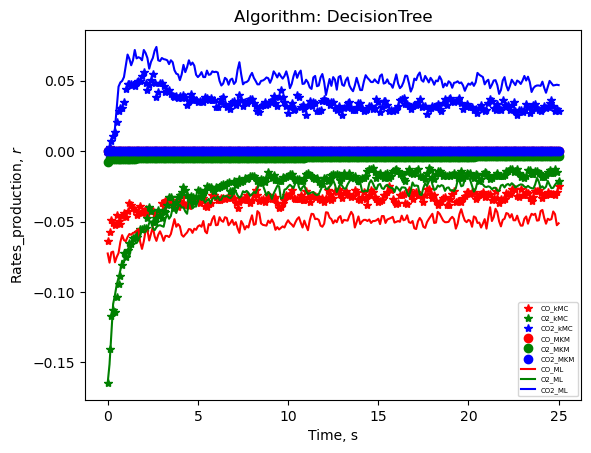

CPU times: user 44min 16s, sys: 5min 5s, total: 49min 22s
Wall time: 9min 16s


In [39]:
%%time
#%matplotlib notebook
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

algs = ['XGBoost','ANN','KNN','RandomForest','DecisionTree']
rmse_vec = []
for v in np.arange(len(algs)):
    
    print("-"*50)
    print('Algorithm:',algs[v],'\n')
    
    tart_time = time.time()  
    reg = ML_model(algorithm=algs[v])
    end_time = time.time()

    elapsed_time = end_time - start_time
    print("\nElapsed Model Training Time: \n", elapsed_time, "seconds \n", elapsed_time/60, "minutes")
    
    Test_output = reg.predict(Test_input)

    Pred_corr = Test_output[:,-3:] #extracting correction factors #CO #O2 #CO2
    
    #Calculating extracted ML predicted rates
    ML_Rates_pred = np.zeros((len(test_data_time_interv),3)) #CO, O2, CO2
    for i in np.arange(np.shape(ML_Rates_pred)[0]):
        for j in np.arange(np.shape(ML_Rates_pred)[1]):
            ML_Rates_pred[i,j] = MKM_Rates_test_inp[i,j]*np.exp(Pred_corr[i,j])
    
    #Calculating the root mean squared of the test set
    rmse = sqrt(mean_squared_error(KMC_Data_EXP_rates, ML_Rates_pred))
    print('\nRoot Mean Squared Error when using',algs[v],':\n',rmse)
    rmse_vec.append(rmse)
    
    plt.figure()
    plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,0],'r*', label='O2_kMC')        
    plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,1],'g*', label='CO_kMC') 
    plt.plot(test_data_time_interv, KMC_Data_EXP_rates.values[:,2], 'b*', label='CO2_kMC') 

    plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,0],'ro', label='O2_MKM')        
    plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,1],'go', label='CO_MKM') 
    plt.plot(test_data_time_interv, MKM_Rates_test_inp[:,2], 'bo', label='CO2_MKM') 

    plt.plot(test_data_time_interv, ML_Rates_pred[:,0],'r-', label='O2_ML')        
    plt.plot(test_data_time_interv, ML_Rates_pred[:,1],'g-', label='CO_ML') 
    plt.plot(test_data_time_interv, ML_Rates_pred[:,2], 'b-', label='CO2_ML') 

    plt.xlabel('Time, s')
    plt.ylabel("Rates_production, $r$")
    plt.title('Algorithm: {}'.format(algs[v]))
    plt.legend(fontsize=5, loc='best')

    plt.show()

In [40]:
print("The ML model giving the smallest rmse of", rmse_vec[np.argmin(rmse_vec)],"is : \n",algs[np.argmin(rmse_vec)]) 

The ML model giving the smallest rmse of 0.015251661601720434 is : 
 RandomForest
